In [323]:
library(readxl)
library(dplyr)
library(ggplot2)
library(stringr)
library(fdth)


Attaching package: 'fdth'


The following objects are masked from 'package:stats':

    sd, var




In [300]:
celeste <- '#2196f3'
amarillo <- '#ffeb3b'
rojo_naranja <- '#f44336'
rosa_fuerte <- '#e91e63'
azul <- '#2962ff'
verde <- '#4caf50'
violeta <- '#bb3af2'
naranja <- '#ea7441'
verde_claro <- '#8bc34a'
verde_celeste <- '#009688'
rosa_fuerte <- '#ff4081'
rojo_fuerte <- '#ff5252'
naranja_oscuro <- '#ff6e40'
amarillo_fuerte <- '#ffc107'
amarillo_verde <- '#aeea00'
azul_verde <- '#00bfa5'
verde_agua <- '#1de9b6'
celeste <- '#00b0ff'
violeta_oscuro <- '#8e24aa'
violeta_rosado <- '#d500f9'
fucsia <- '#f50057'
azul_violeta <- '#311b92'
violeta_fuerte <- '#6200ea'
celeste_agua <- '#64ffda'
naranja_fuerte4 <- '#ff5722'

In [301]:
Victoria_primaria <- read_excel("C:/Users/ayrto/OneDrive/Escritorio/Exploración de Datos Multivariados/1 - Trabajo Practico/VICTORIA_BASE_PRIMARIA_LIMPIA.xlsx")
Victoria_secundaria <- read_excel("C:/Users/ayrto/OneDrive/Escritorio/Exploración de Datos Multivariados/1 - Trabajo Practico/VICTORIA_BASE_SECUNDARIA_LIMPIA.xlsx")

In [302]:
Victoria <- rbind(Victoria_primaria, Victoria_secundaria) #juntamos los archivos por si los necesitamos unidos

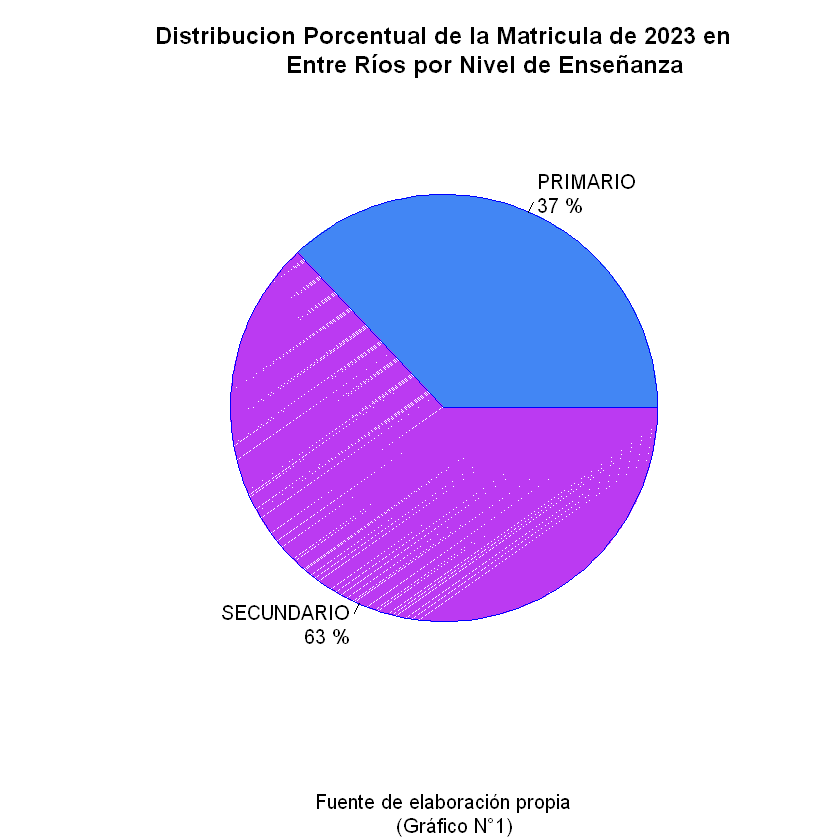

In [247]:
pie_commute <- round(100 * table(Victoria$NivelEnseñanza) / length(Victoria$NivelEnseñanza))

colors = c('#4286f4','#bb3af2')

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
            Entre Ríos por Nivel de Enseñanza",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°1)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'blue')

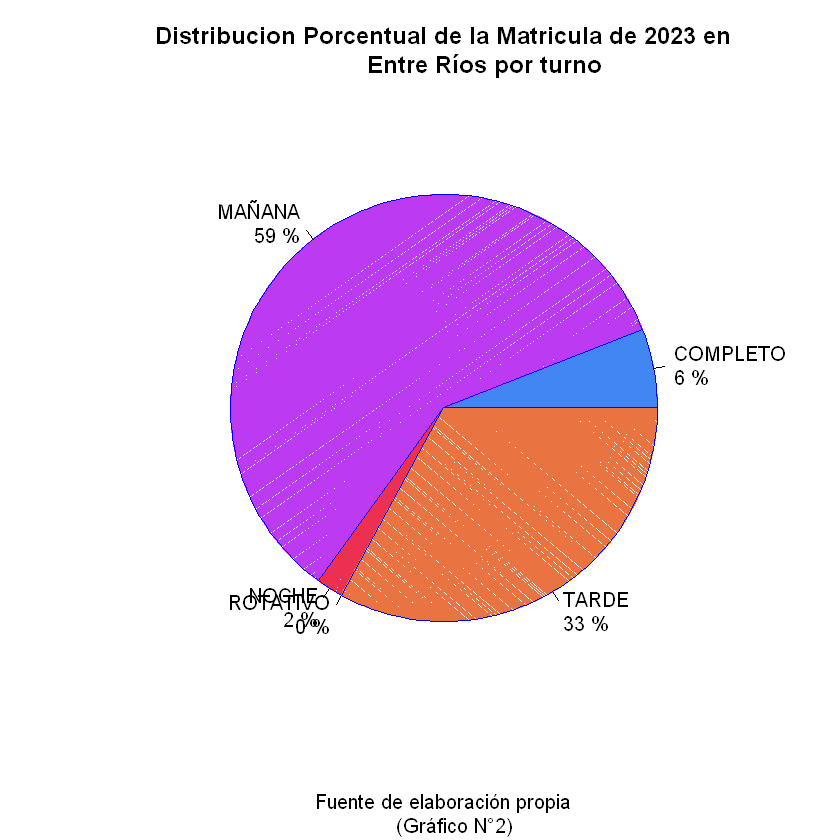

In [248]:
pie_commute <- round(100 * table(Victoria$turno) / length(Victoria$turno))

colors = c('#4286f4','#bb3af2','#ed2f52','#efc023','#ea7441')

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
            Entre Ríos por turno",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°2)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'blue')

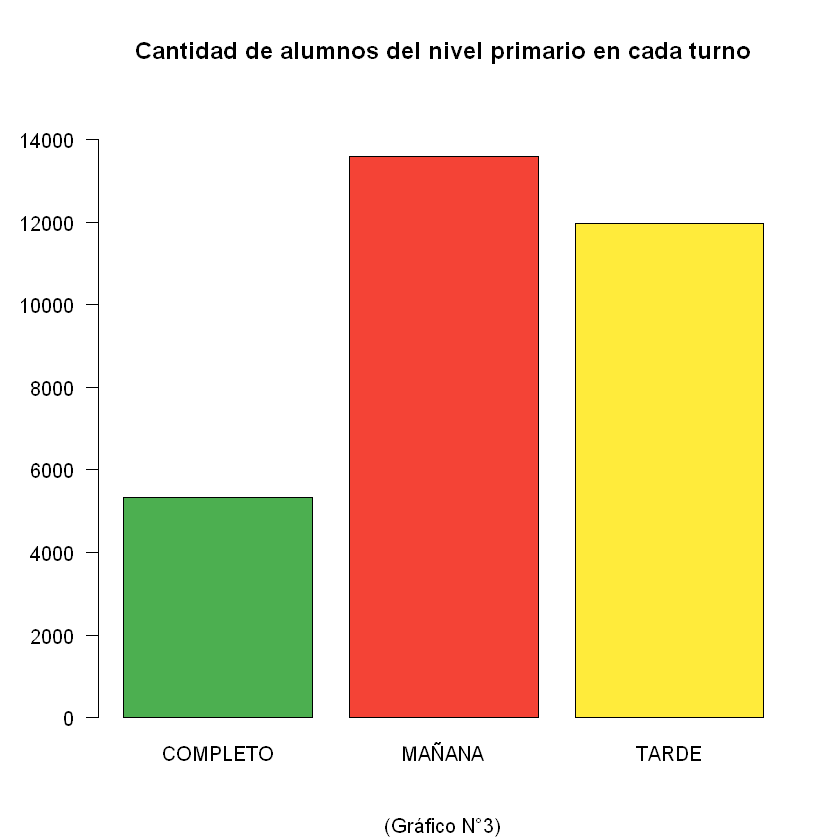

In [249]:
#tabla de frecuencias
tabla <- table(Victoria_primaria$turno)

#gráfico de barras de frecuencia absoluta
barplot(tabla, main = "Cantidad de alumnos del nivel primario en cada turno",
        sub = "(Gráfico N°3)",
        col.sub = "black",
        col = c(verde, rojo, amarillo), ylim = c(0, 15000), las = 1)

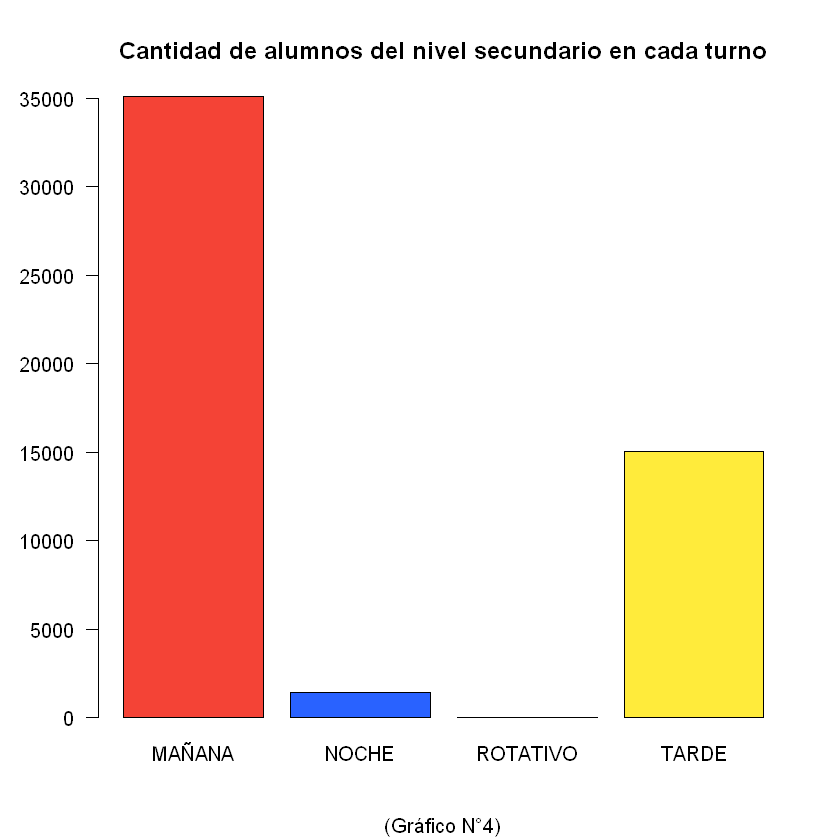

In [250]:
tabla <- table(Victoria_secundaria$turno)
barplot(tabla, main = "Cantidad de alumnos del nivel secundario en cada turno",
        sub = "(Gráfico N°4)",
        col.sub = "black",
        col = c(rojo,azul,verde,amarillo), ylim = c(0, 35000), las = 1)

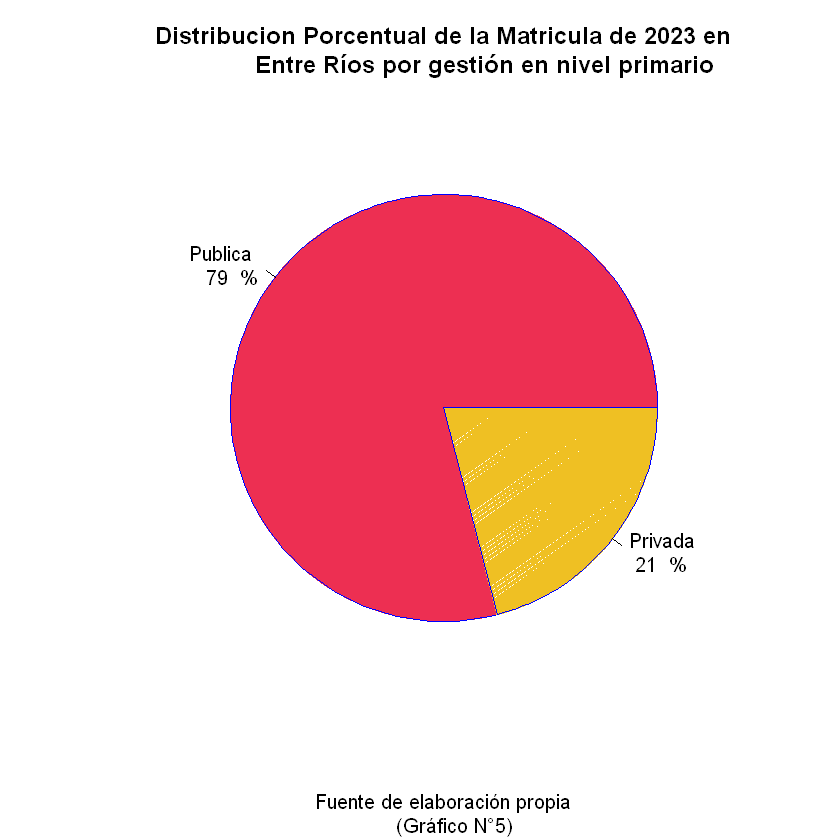

In [251]:
pie_commute <- round(100 * table(Victoria_primaria$EsPrivada) / length(Victoria_primaria$EsPrivada))
titulos <- c("Publica", "Privada")
colors = c('#ed2f52','#efc023')

pie(pie_commute, labels = paste(titulos,'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
            Entre Ríos por gestión en nivel primario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°5)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'blue')

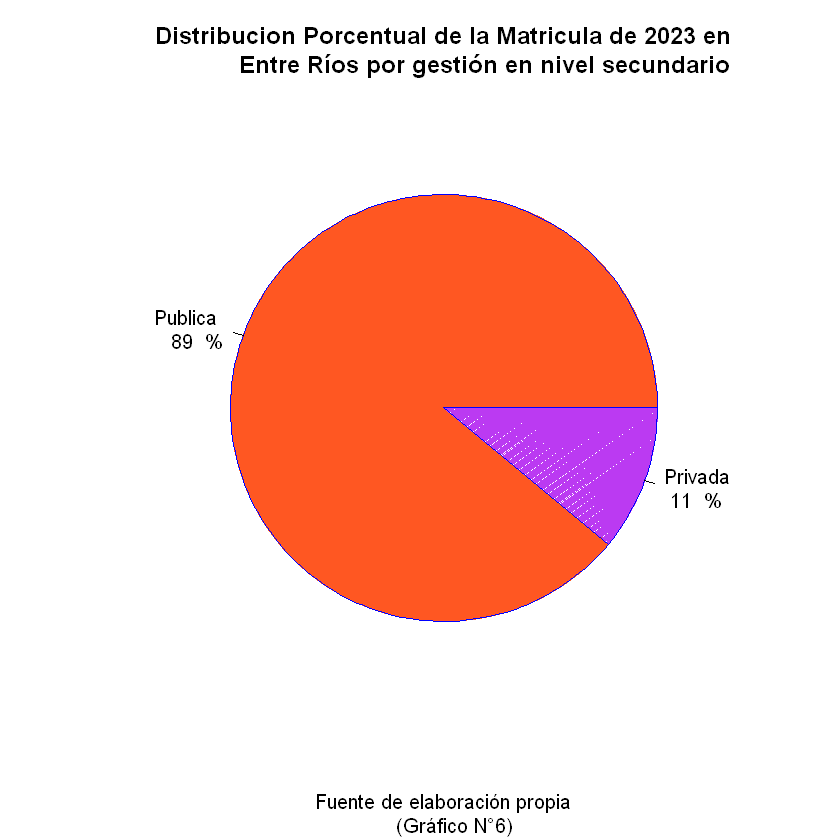

In [252]:
pie_commute <- round(100 * table(Victoria_secundaria$EsPrivada) / length(Victoria_secundaria$EsPrivada))
titulos <- c("Publica", "Privada")

colors = c(naranja_fuerte4,'#bb3af2')

pie(pie_commute, labels = paste(titulos,'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
            Entre Ríos por gestión en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°6)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'blue')

In [303]:
Victoria_primaria <- filter(Victoria_primaria, Año_curso== "PRIMERO" |  Año_curso== "SEGUNDO" |  Año_curso== "TERCERO" |
                     Año_curso== "CUARTO" |  Año_curso== "QUINTO" |  Año_curso== "SEXTO")

Victoria_secundaria <- filter(Victoria_secundaria, Año_curso== "PRIMERO" |  Año_curso== "SEGUNDO" |  Año_curso== "TERCERO" |
                     Año_curso== "CUARTO" |  Año_curso== "QUINTO" |  Año_curso== "SEXTO" |  Año_curso== "SEPTIMO")

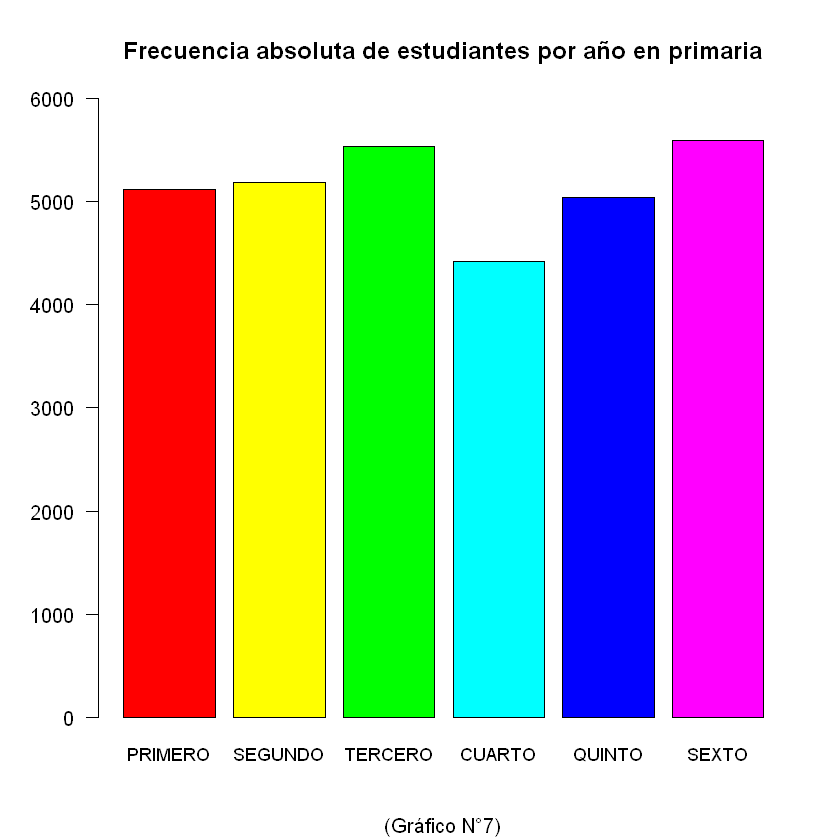

In [254]:
datos <- table(Victoria_primaria$Año_curso)
tabla_años <- as.data.frame(datos)
names(tabla_años) <- c("Año", "Freq")
tabla_años <- tabla_años %>% arrange(factor(Año, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO')))
#grafico de barras de frecuencia absoluta ordenado por año
barplot(tabla_años$Freq, names = tabla_años$Año, main = "Frecuencia absoluta de estudiantes por año en primaria",
        sub = "(Gráfico N°7)",
        col.sub = "black",
        col = rainbow(6), ylim = c(0, 6000), las = 1, cex.names = 0.9)

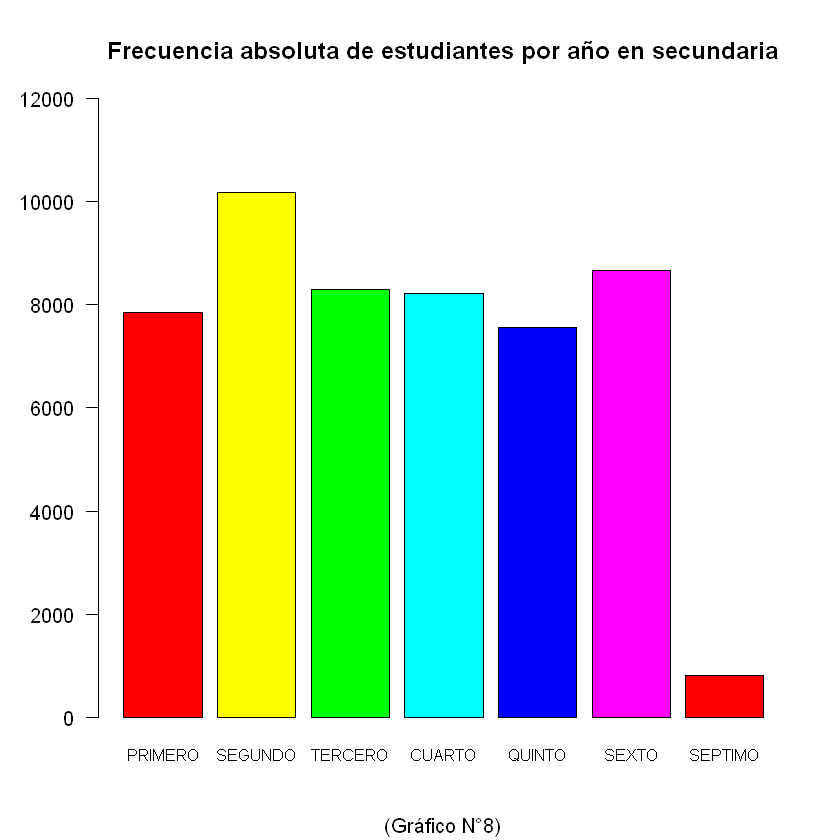

In [255]:
datos2 <- table(Victoria_secundaria$Año_curso)
tabla_años2 <- as.data.frame(datos2)
names(tabla_años2) <- c("Año", "Freq")
tabla_años2 <- tabla_años2 %>% arrange(factor(Año, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO','SEPTIMO')))
#grafico de barras de frecuencia absoluta ordenado por año
barplot(tabla_años2$Freq, names = tabla_años2$Año, main = "Frecuencia absoluta de estudiantes por año en secundaria",
        sub = "(Gráfico N°8)",
        col.sub = "black",
        col = rainbow(6), ylim = c(0, 12000), las = 1, cex.names = 0.8)

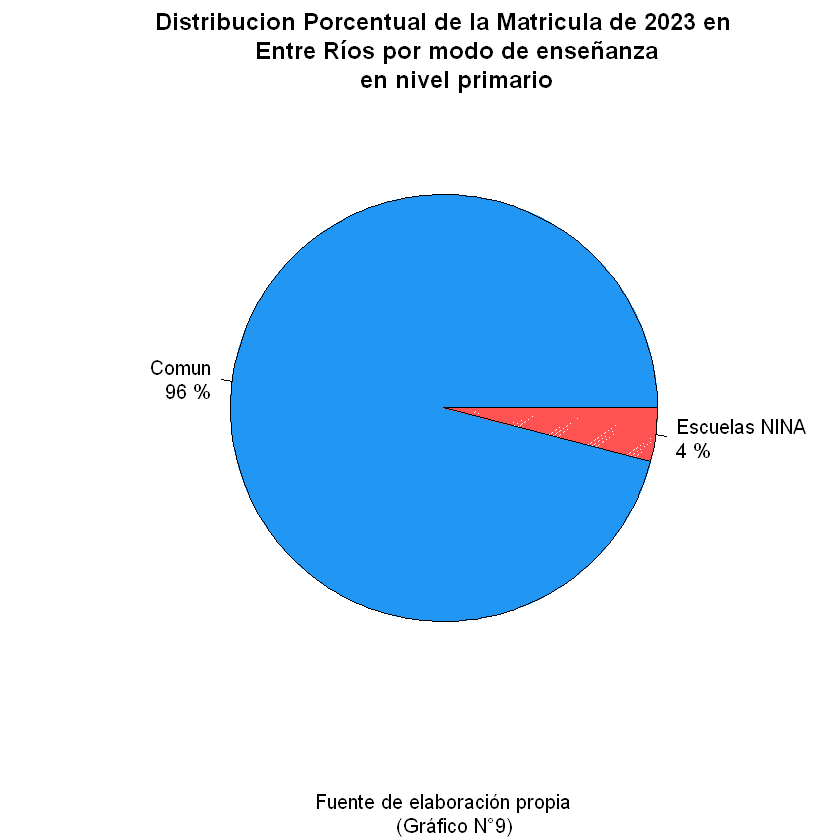

In [256]:
pie_commute <- round(100 * table(Victoria_primaria$ModEnseñanza) / length(Victoria_primaria$ModEnseñanza))

colors = c('#2196f3',rojo_fuerte)

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
    Entre Ríos por modo de enseñanza
    en nivel primario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°9)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

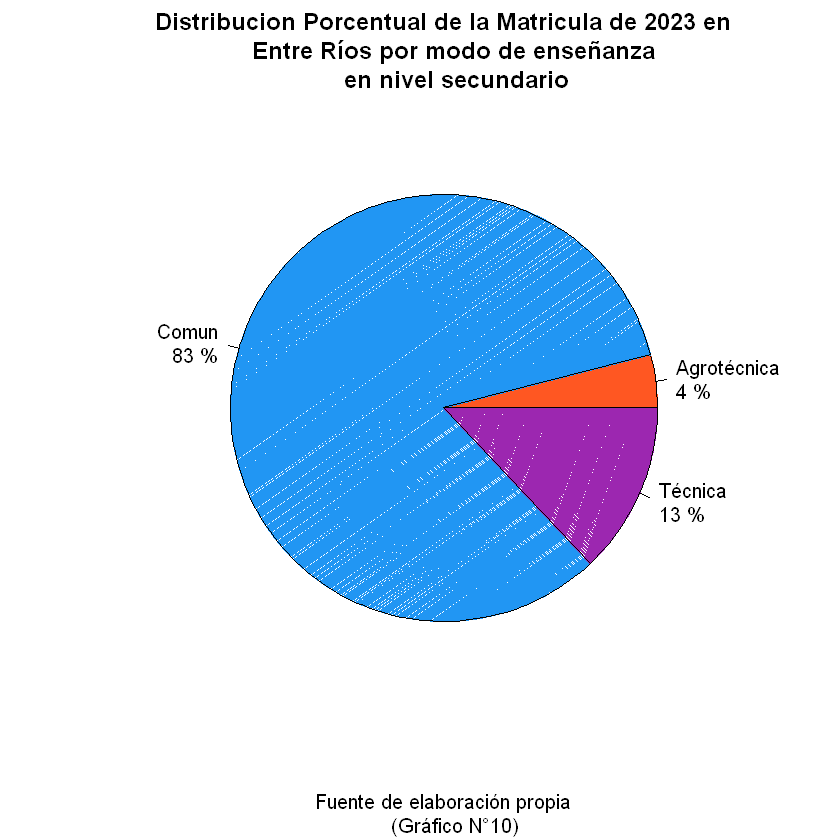

In [257]:
pie_commute <- round(100 * table(Victoria_secundaria$ModEnseñanza) / length(Victoria_secundaria$ModEnseñanza))

colors = c('#ff5722','#2196f3','#9c27b0')

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
    Entre Ríos por modo de enseñanza 
    en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°10)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

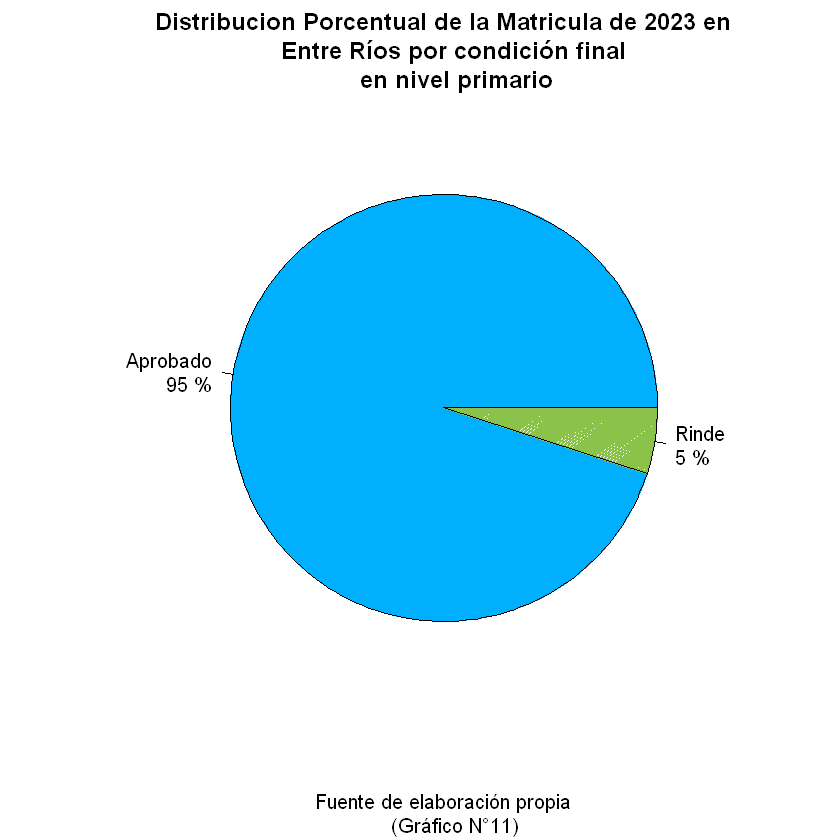

In [258]:
pie_commute <- round(100 * table(Victoria_primaria$Condición) / length(Victoria_primaria$Condición))

colors = c(celeste,verde_claro)

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
    Entre Ríos por condición final 
    en nivel primario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°11)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

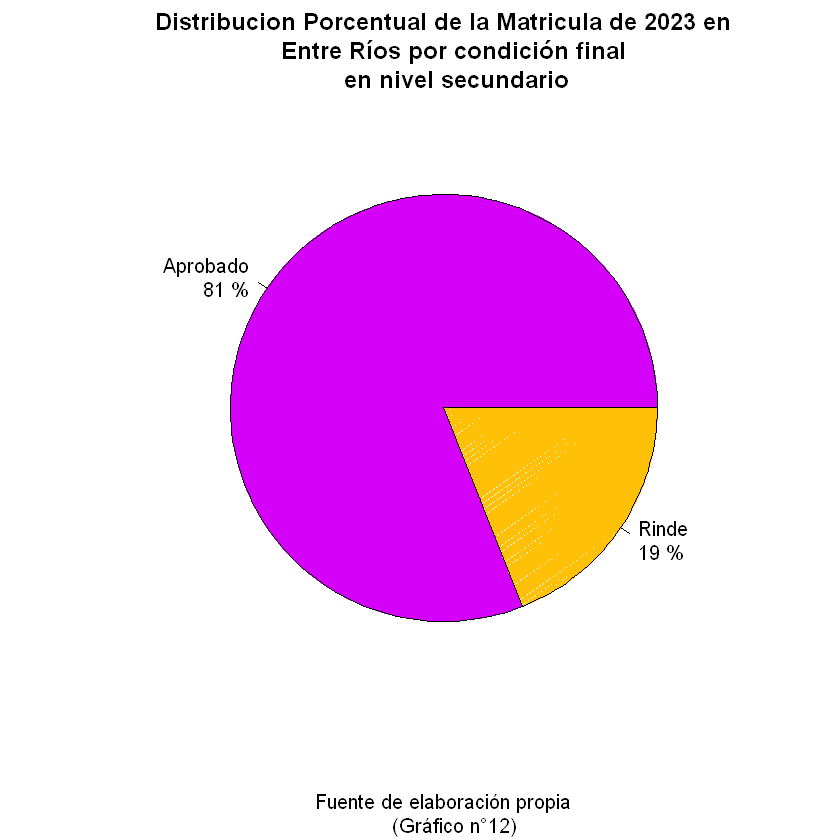

In [259]:
pie_commute <- round(100 * table(Victoria_secundaria$Condición) / length(Victoria_secundaria$Condición))

colors = c(violeta_rosado,amarillo_oscuro)
pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
    Entre Ríos por condición final 
    en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico n°12)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

In [304]:
Victoria_primaria_primero_mat <- dplyr::select(filter(Victoria_primaria, Año_curso == "PRIMERO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_primero_len <- dplyr::select(filter(Victoria_primaria, Año_curso == "PRIMERO" & (asignatura == "LENGUA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()


Victoria_primaria_segundo_mat <- dplyr::select(filter(Victoria_primaria, Año_curso == "SEGUNDO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_segundo_len <- dplyr::select(filter(Victoria_primaria, Año_curso == "SEGUNDO" & (asignatura == "LENGUA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_tercero_mat <- dplyr::select(filter(Victoria_primaria, Año_curso == "TERCERO" & ( asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_tercero_len <- dplyr::select(filter(Victoria_primaria, Año_curso == "TERCERO" & (asignatura == "LENGUA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_cuarto_mat <- dplyr::select(filter(Victoria_primaria, Año_curso == "CUARTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_cuarto_len <- dplyr::select(filter(Victoria_primaria, Año_curso == "CUARTO" & (asignatura == "LENGUA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_quinto_mat <- dplyr::select(filter(Victoria_primaria, Año_curso == "QUINTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_quinto_len <- dplyr::select(filter(Victoria_primaria, Año_curso == "QUINTO" & (asignatura == "LENGUA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_sexto_mat <- dplyr::select(filter(Victoria_primaria, Año_curso == "SEXTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_primaria_sexto_len <- dplyr::select(filter(Victoria_primaria, Año_curso == "SEXTO" & (asignatura == "LENGUA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

In [317]:
Victoria_secundaria_primero_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "PRIMERO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_primero_len <- dplyr::select(filter(Victoria_secundaria, Año_curso == "PRIMERO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_segundo_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "SEGUNDO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_segundo_len <- dplyr::select(filter(Victoria_secundaria, Año_curso == "SEGUNDO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_tercero_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "TERCERO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_tercero_len <- dplyr::select(filter(Victoria_secundaria, Año_curso == "TERCERO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_cuarto_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "CUARTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_cuarto_len <- dplyr::select(filter(Victoria_secundaria, Año_curso == "CUARTO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_quinto_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "QUINTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_quinto_len <- dplyr::select(filter(Victoria_secundaria, Año_curso == "QUINTO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_sexto_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "SEXTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_sexto_len <- dplyr::select(filter(Victoria_secundaria, Año_curso == "SEXTO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_septimo_mat <- dplyr::select(filter(Victoria_secundaria, Año_curso == "SEPTIMO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

Victoria_secundaria_septimo_agro <- dplyr::select(filter(Victoria_secundaria, Año_curso == "SEPTIMO" & (asignatura == "CIENCIAS AGROPECUARIAS"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, departamento, Documento) %>%
  distinct()

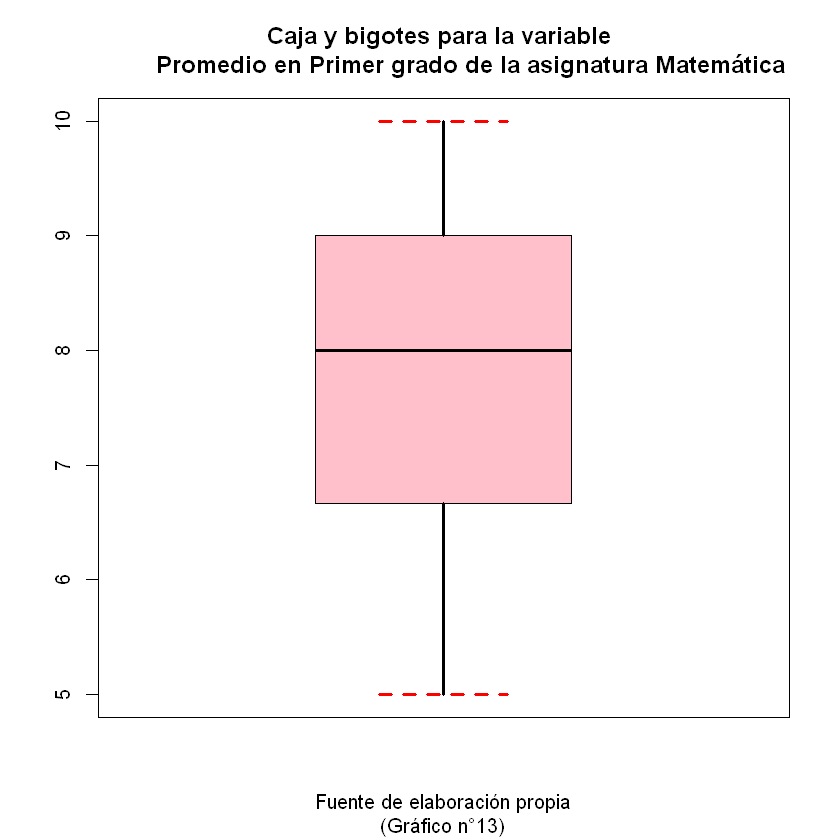

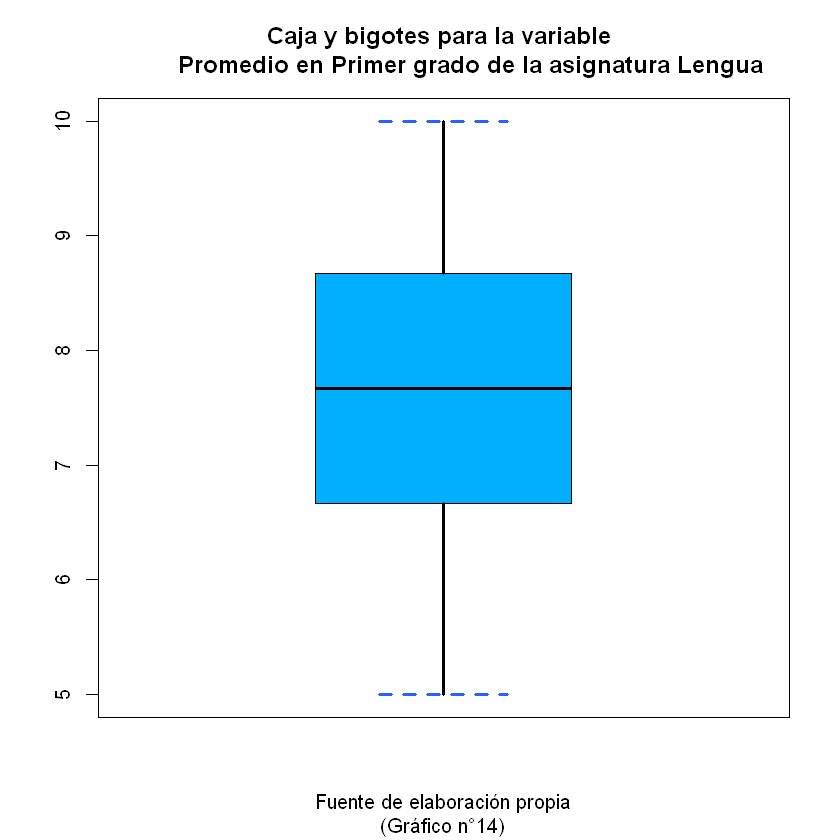

In [319]:
boxplot(Victoria_primaria_primero_mat[!is.na(Victoria_primaria_primero_mat$Promedio),]$Promedio,
        main = "Caja y bigotes para la variable 
        Promedio en Primer grado de la asignatura Matemática",
        whisklty = 1,       # Tipo línea bigotes
        whisklwd = 3,       # Ancho línea bigotes
        whiskcol = "black",   # Color bigotes
        staplelty = 2,      # Tipo línea barras
        staplelwd = 3,      # Ancho línea barras
        staplecol = "red",  # Color barras
        col = "pink",     # Color caja
        sub = "Fuente de elaboración propia
(Gráfico n°13)",
        col.sub = "black")

boxplot(Victoria_primaria_primero_len[!is.na(Victoria_primaria_primero_len$Promedio),]$Promedio,
        main = "Caja y bigotes para la variable 
        Promedio en Primer grado de la asignatura Lengua",
        whisklty = 1,       # Tipo línea bigotes
        whisklwd = 3,       # Ancho línea bigotes
        whiskcol = "black",   # Color bigotes
        staplelty = 2,      # Tipo línea barras
        staplelwd = 3,      # Ancho línea barras
        staplecol = azul,  # Color barras
        col = celeste,     # Color caja
        sub = "Fuente de elaboración propia
(Gráfico n°14)",
        col.sub = "black")


	Shapiro-Wilk normality test

data:  Victoria_primaria_primero_mat$Promedio
W = 0.94488, p-value = 1.282e-13


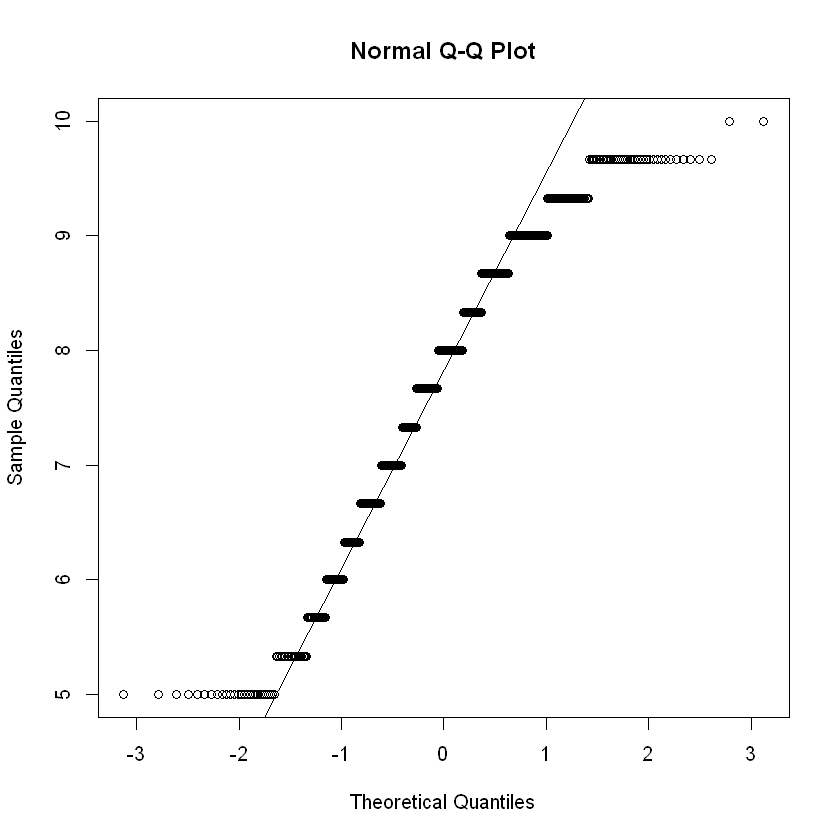


	Shapiro-Wilk normality test

data:  Victoria_primaria_primero_len$Promedio
W = 0.94423, p-value = 9.419e-14


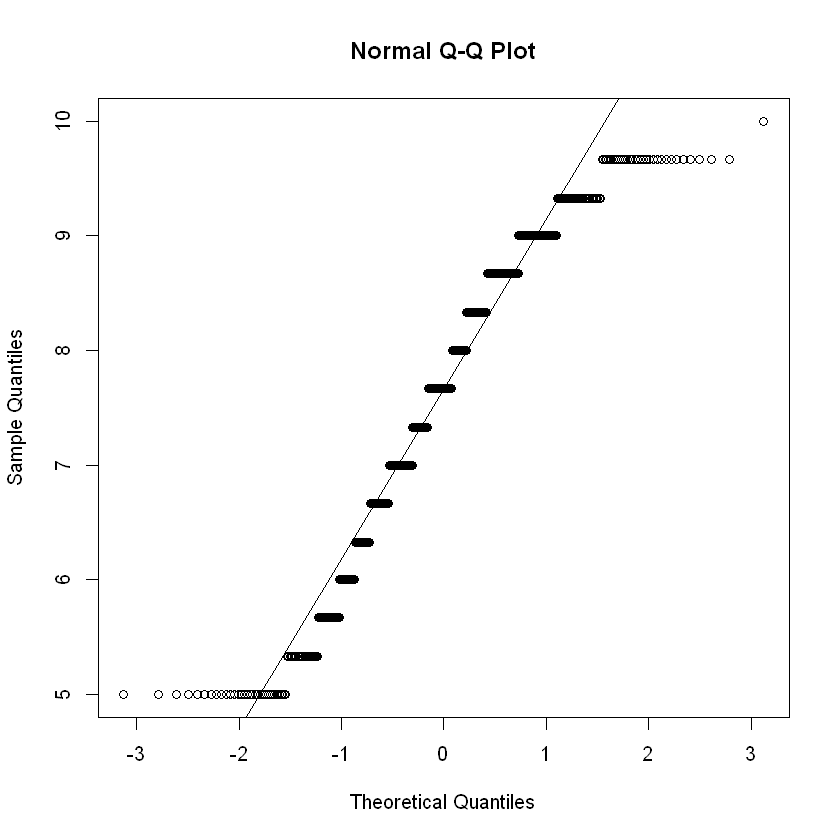

In [320]:
qqnorm(as.numeric(Victoria_primaria_primero_mat[!is.na(Victoria_primaria_primero_mat$Promedio),]$Promedio))
qqline(as.numeric(Victoria_primaria_primero_mat[!is.na(Victoria_primaria_primero_mat$Promedio),]$Promedio))
shapiro.test(Victoria_primaria_primero_mat$Promedio)

qqnorm(as.numeric(Victoria_primaria_primero_len[!is.na(Victoria_primaria_primero_len$Promedio),]$Promedio))
qqline(as.numeric(Victoria_primaria_primero_len[!is.na(Victoria_primaria_primero_len$Promedio),]$Promedio))
shapiro.test(Victoria_primaria_primero_len$Promedio)

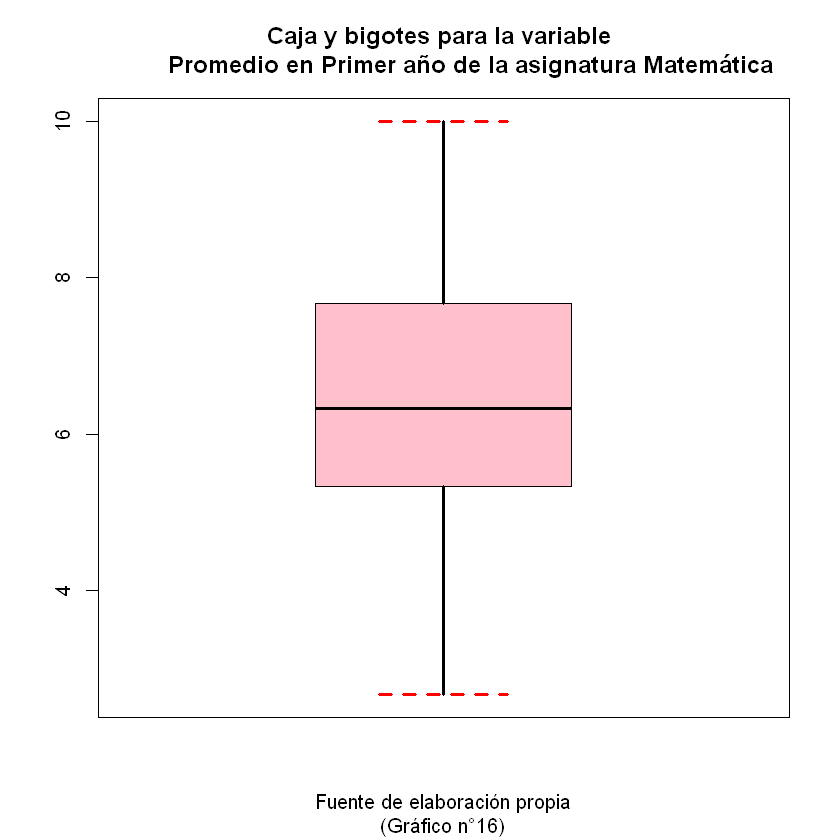

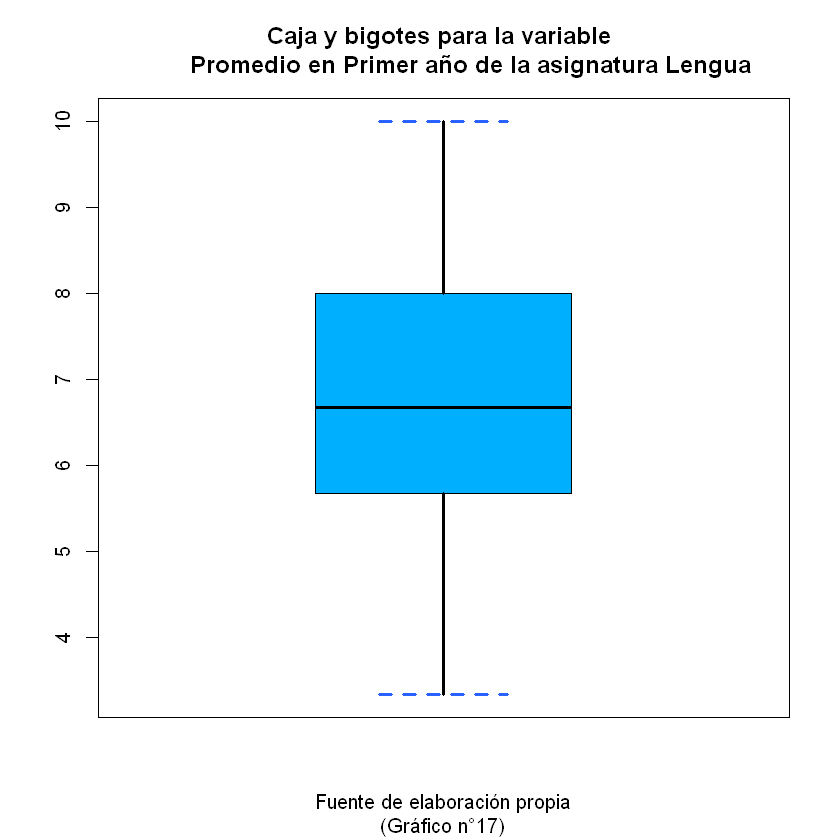

In [321]:
boxplot(Victoria_secundaria_primero_mat[!is.na(Victoria_secundaria_primero_mat$Promedio),]$Promedio,
        main = "Caja y bigotes para la variable 
        Promedio en Primer año de la asignatura Matemática",
        whisklty = 1,       # Tipo línea bigotes
        whisklwd = 3,       # Ancho línea bigotes
        whiskcol = "black",   # Color bigotes
        staplelty = 2,      # Tipo línea barras
        staplelwd = 3,      # Ancho línea barras
        staplecol = "red",  # Color barras
        col = "pink",     # Color caja
        sub = "Fuente de elaboración propia
(Gráfico n°16)",
        col.sub = "black")

boxplot(Victoria_secundaria_primero_len[!is.na(Victoria_secundaria_primero_len$Promedio),]$Promedio,
        main = "Caja y bigotes para la variable 
        Promedio en Primer año de la asignatura Lengua",
        whisklty = 1,       # Tipo línea bigotes
        whisklwd = 3,       # Ancho línea bigotes
        whiskcol = "black",   # Color bigotes
        staplelty = 2,      # Tipo línea barras
        staplelwd = 3,      # Ancho línea barras
        staplecol = azul,  # Color barras
        col = celeste,     # Color caja
        sub = "Fuente de elaboración propia
(Gráfico n°17)",
        col.sub = "black")


	Shapiro-Wilk normality test

data:  Victoria_primaria_primero_mat$Promedio
W = 0.94488, p-value = 1.282e-13


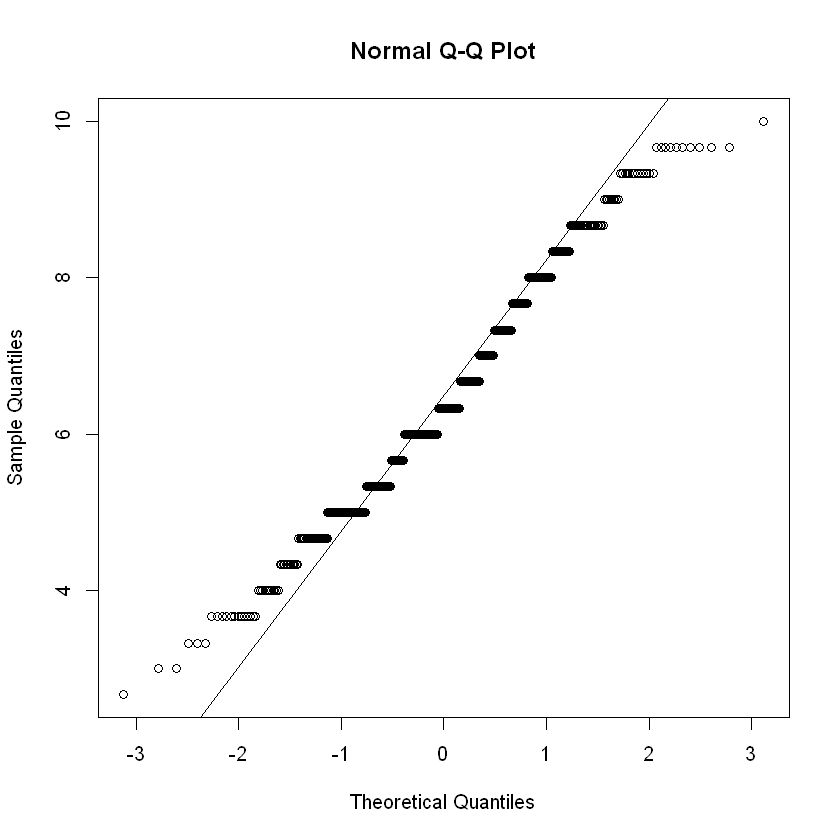


	Shapiro-Wilk normality test

data:  Victoria_secundaria_primero_len$Promedio
W = 0.98238, p-value = 5.132e-06


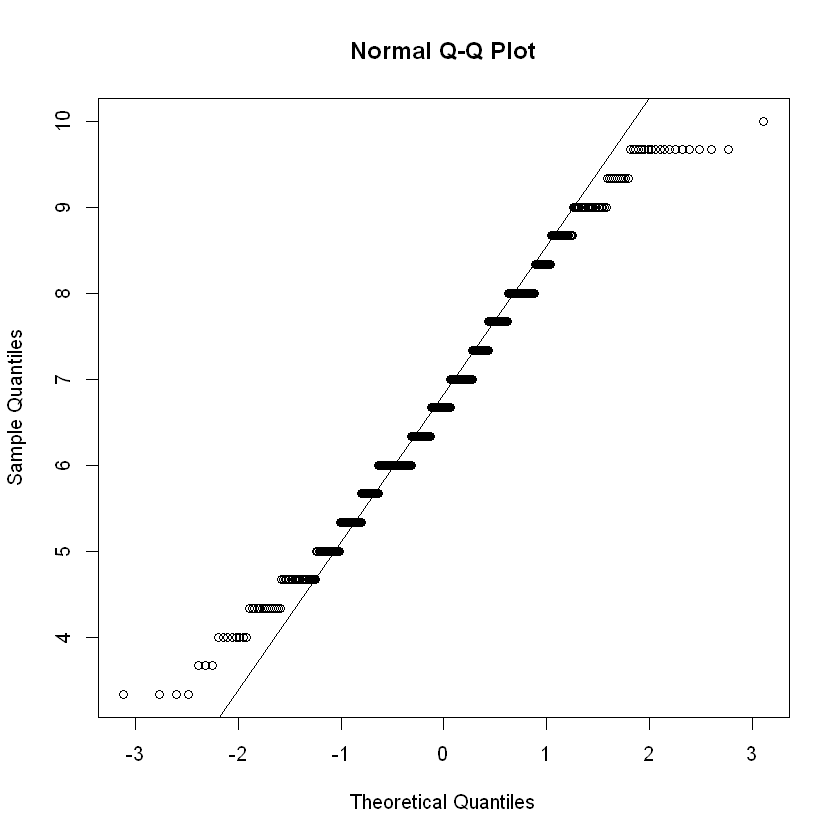

In [322]:
qqnorm(as.numeric(Victoria_secundaria_primero_mat[!is.na(Victoria_secundaria_primero_mat$Promedio),]$Promedio))
qqline(as.numeric(Victoria_secundaria_primero_mat[!is.na(Victoria_secundaria_primero_mat$Promedio),]$Promedio))
shapiro.test(Victoria_primaria_primero_mat$Promedio)

qqnorm(as.numeric(Victoria_secundaria_primero_len[!is.na(Victoria_secundaria_primero_len$Promedio),]$Promedio))
qqline(as.numeric(Victoria_secundaria_primero_len[!is.na(Victoria_secundaria_primero_len$Promedio),]$Promedio))
shapiro.test(Victoria_secundaria_primero_len$Promedio)

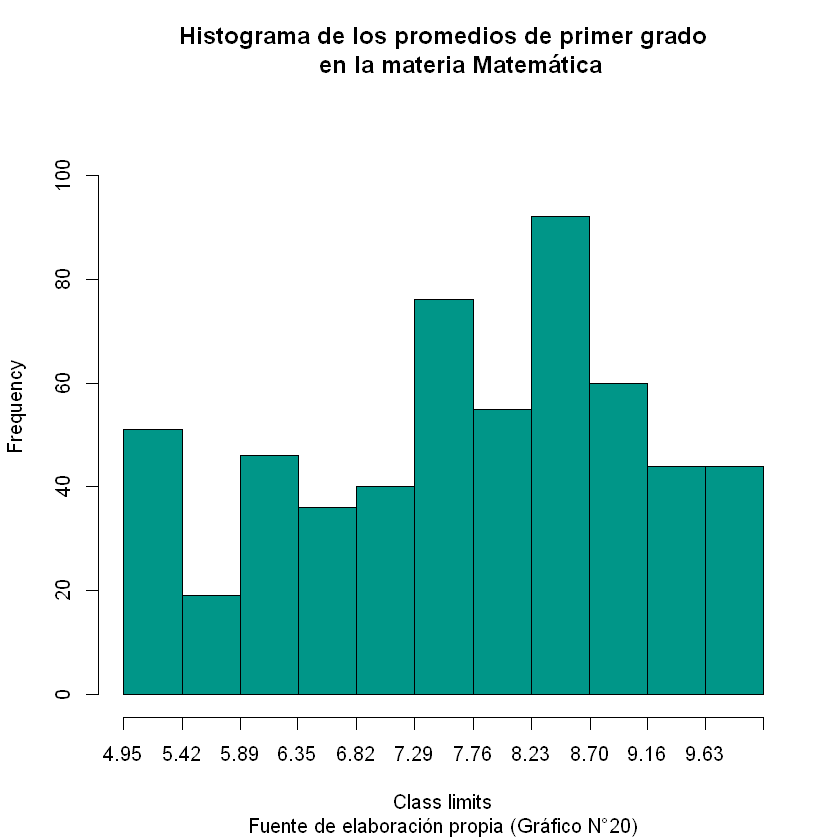

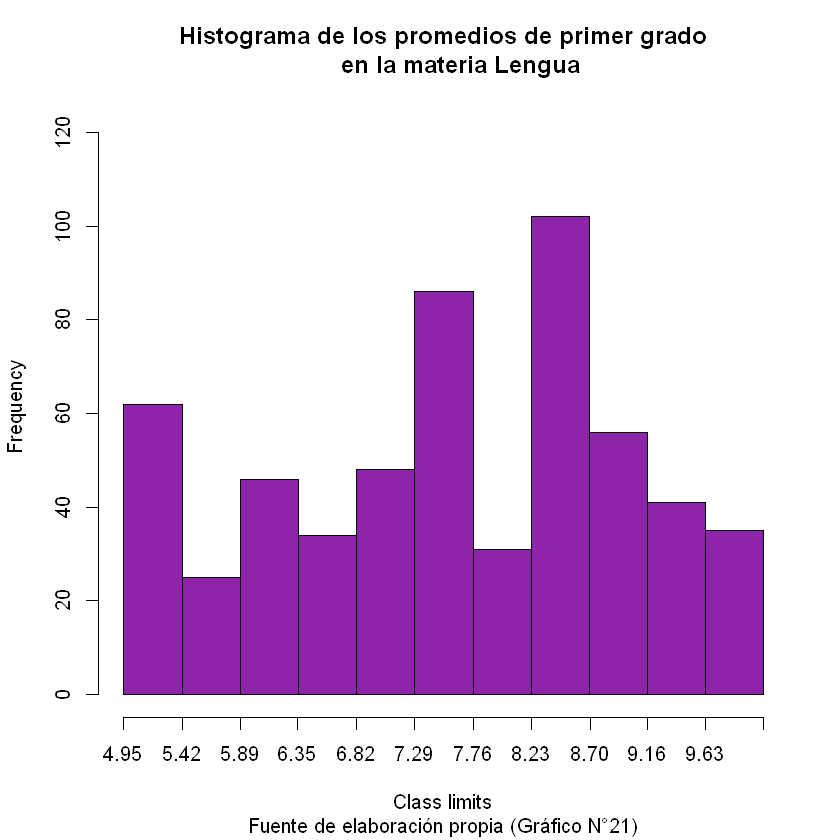

In [339]:
Notas_mat_primero_primaria <- fdt(Victoria_primaria_primero_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_primero_primaria, 
     type= "fh", 
     col= verde_celeste,
     main= "Histograma de los promedios de primer grado
     en la materia Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°20)",
     col.sub= "black",)

Notas_len_primero_primaria <- fdt(Victoria_primaria_primero_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_primero_primaria,
     type= "fh",
     col= violeta_claro,
     main= "Histograma de los promedios de primer grado
     en la materia Lengua",
     sub= "

Fuente de elaboración propia (Gráfico N°21)",
     col.sub= "black",)

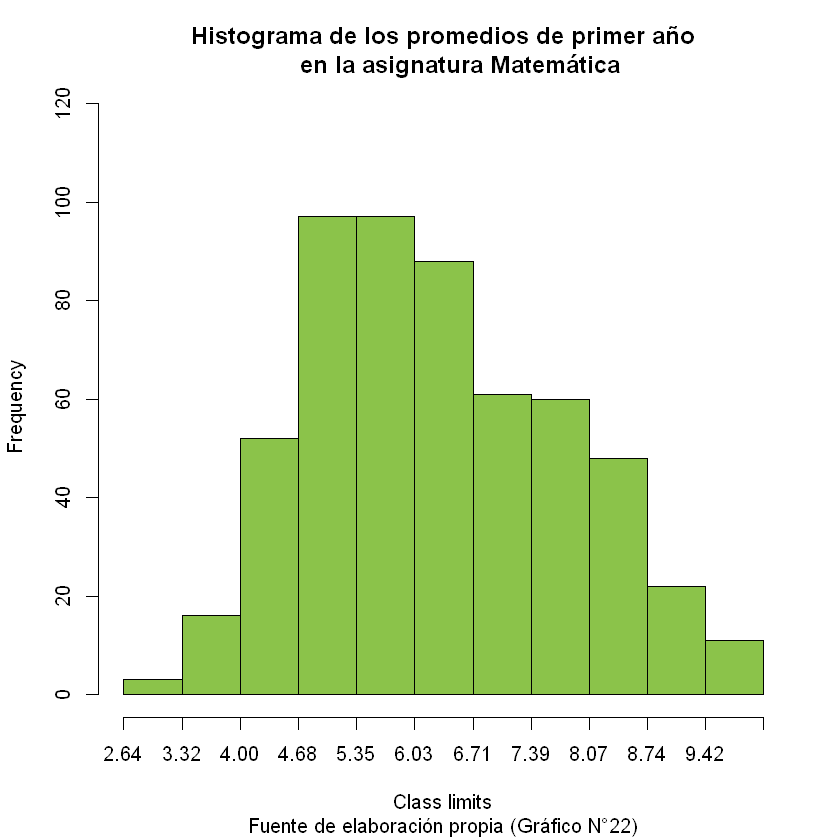

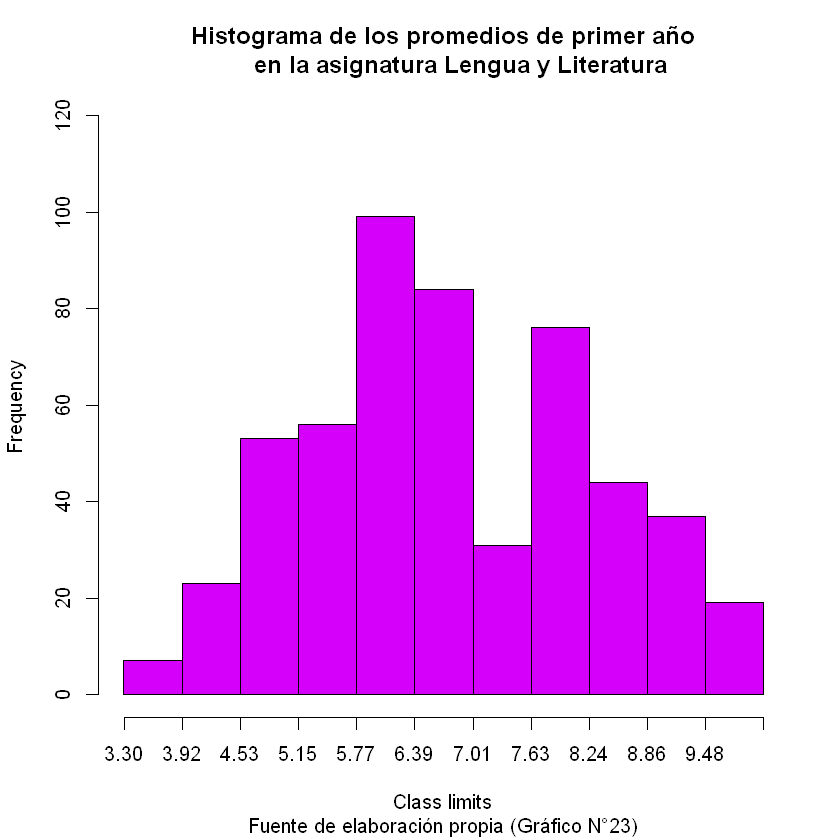

In [340]:
Notas_mat_primero_secundaria <- fdt(Victoria_secundaria_primero_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_primero_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de primer año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°22)",
     col.sub= "black",)

Notas_len_primero_secundaria <- fdt(Victoria_secundaria_primero_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_primero_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de primer año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°23)",
     col.sub= "black",)

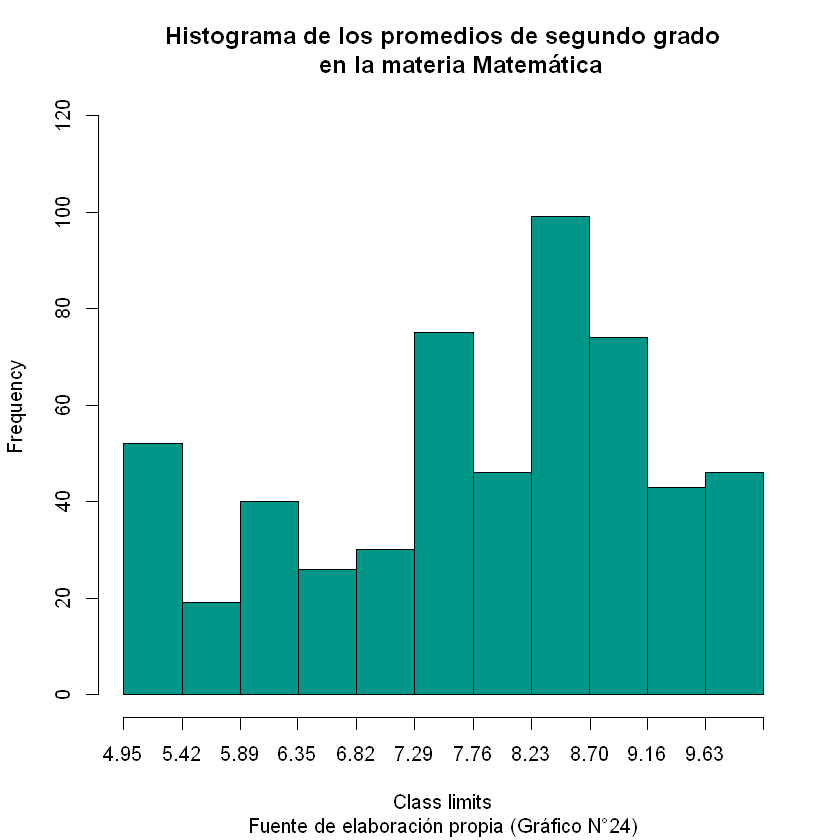

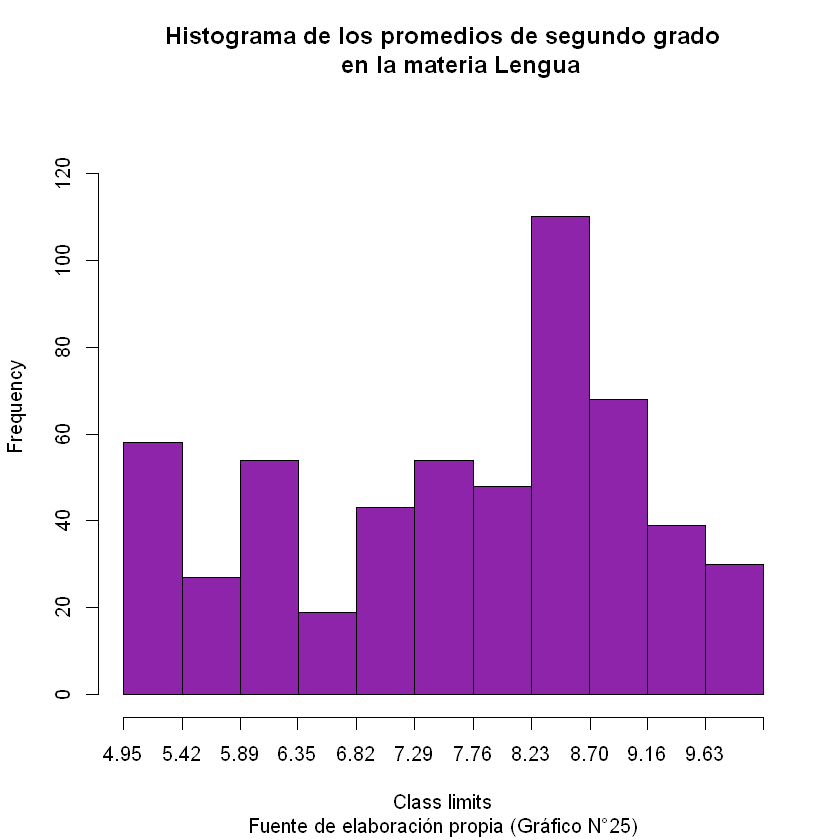

In [341]:
Notas_mat_2_primaria <- fdt(Victoria_primaria_segundo_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_2_primaria, 
     type= "fh", 
     col= verde_celeste,
     main= "Histograma de los promedios de segundo grado
     en la materia Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°24)",
     col.sub= "black",)

Notas_len_2_primaria <- fdt(Victoria_primaria_segundo_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_2_primaria,
     type= "fh",
     col= violeta_claro,
     main= "Histograma de los promedios de segundo grado
     en la materia Lengua",
     sub= "

Fuente de elaboración propia (Gráfico N°25)",
     col.sub= "black",)

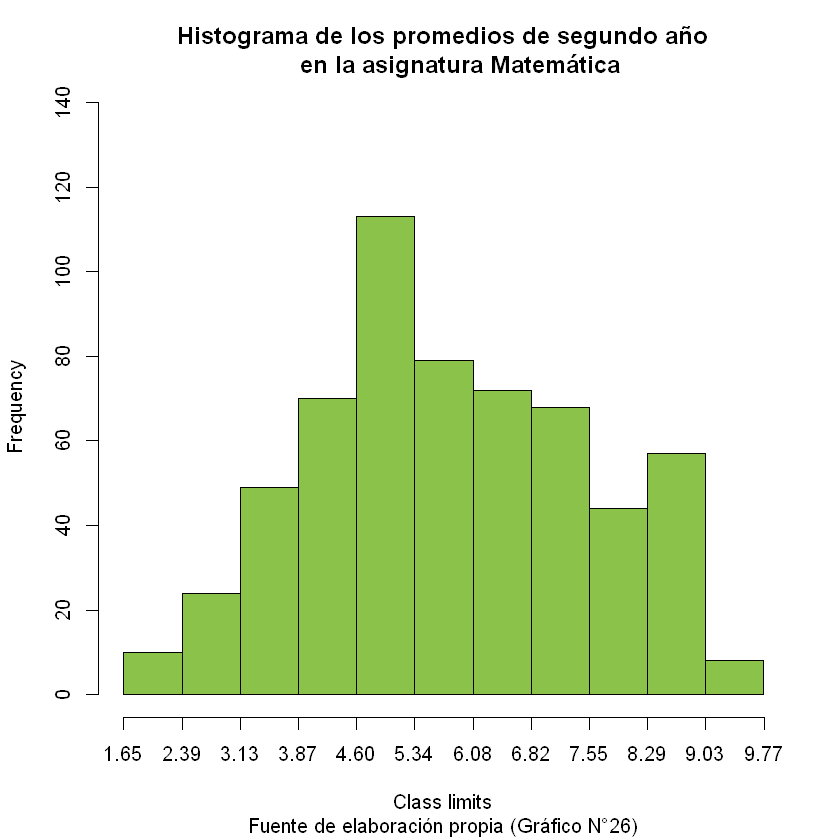

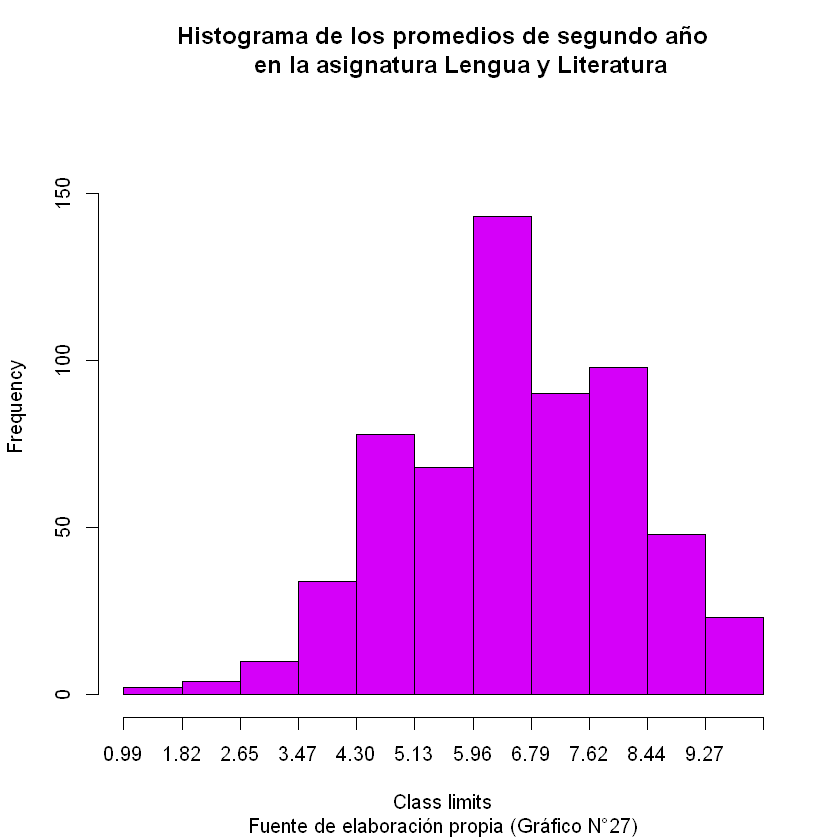

In [346]:
Notas_mat_2_secundaria <- fdt(Victoria_secundaria_segundo_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_2_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de segundo año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°26)",
     col.sub= "black",)

Notas_len_2_secundaria <- fdt(Victoria_secundaria_segundo_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_2_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de segundo año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°27)",
     col.sub= "black",)

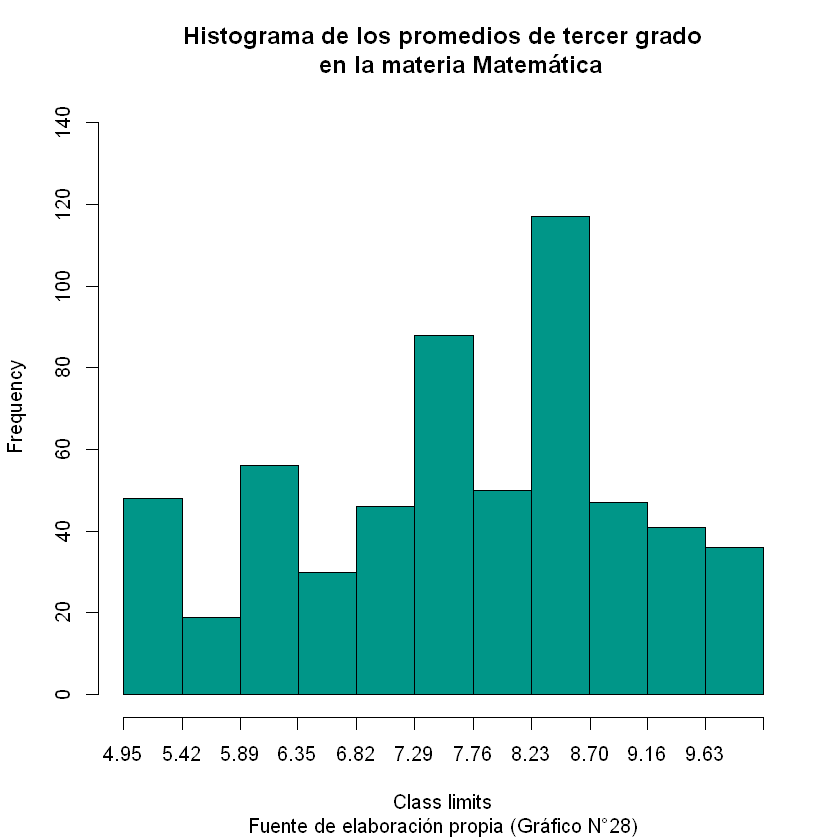

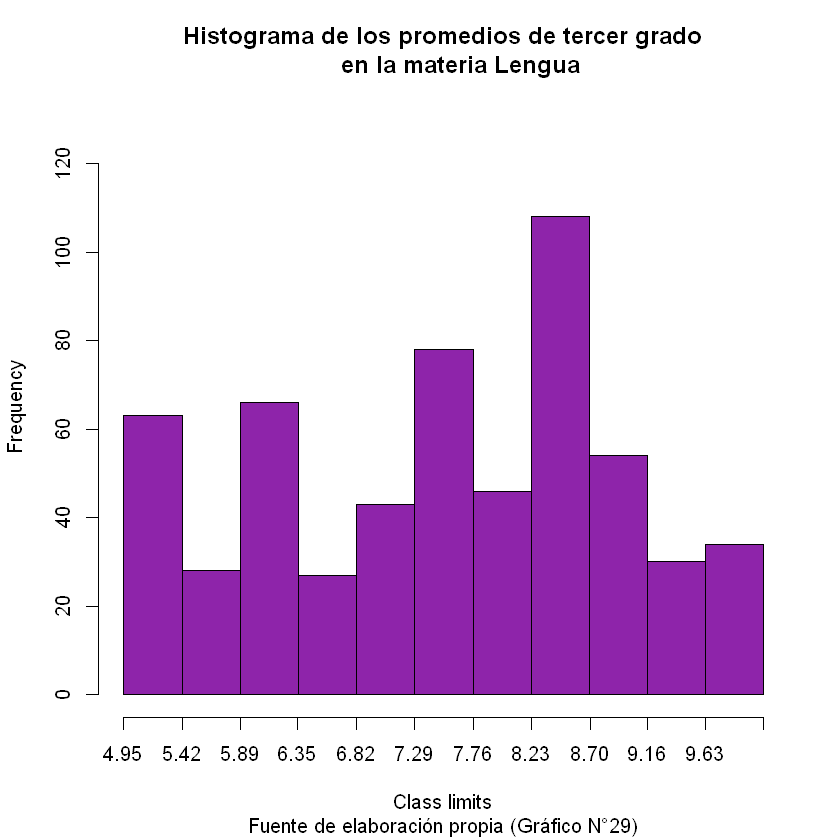

In [342]:
Notas_mat_3_primaria <- fdt(Victoria_primaria_tercero_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_3_primaria, 
     type= "fh", 
     col= verde_celeste,
     main= "Histograma de los promedios de tercer grado
     en la materia Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°28)",
     col.sub= "black",)

Notas_len_3_primaria <- fdt(Victoria_primaria_tercero_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_3_primaria,
     type= "fh",
     col= violeta_claro,
     main= "Histograma de los promedios de tercer grado
     en la materia Lengua",
     sub= "

Fuente de elaboración propia (Gráfico N°29)",
     col.sub= "black",)

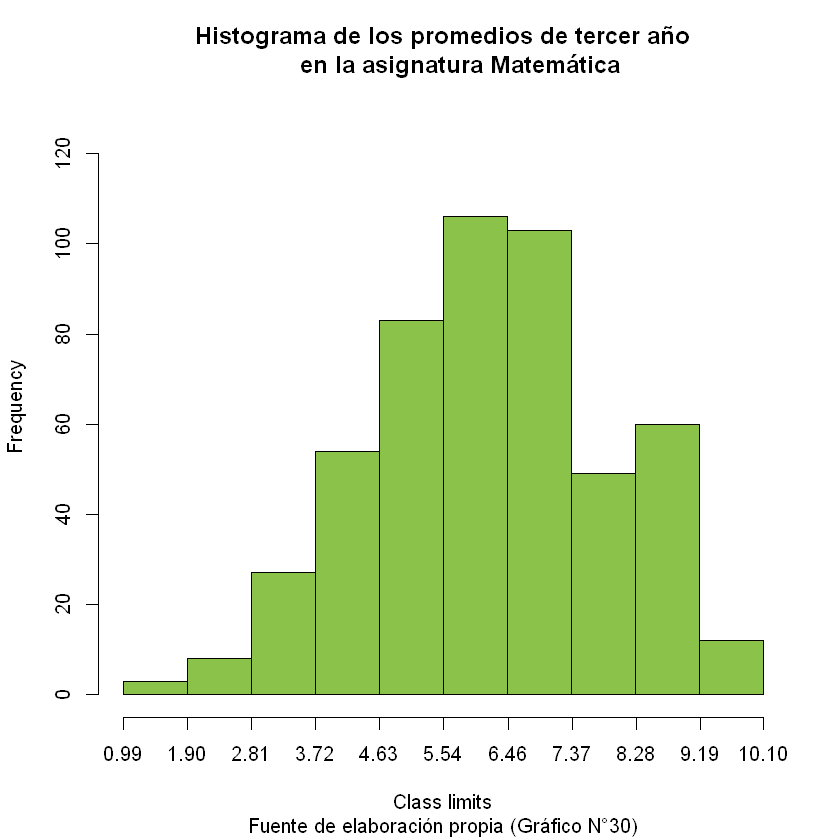

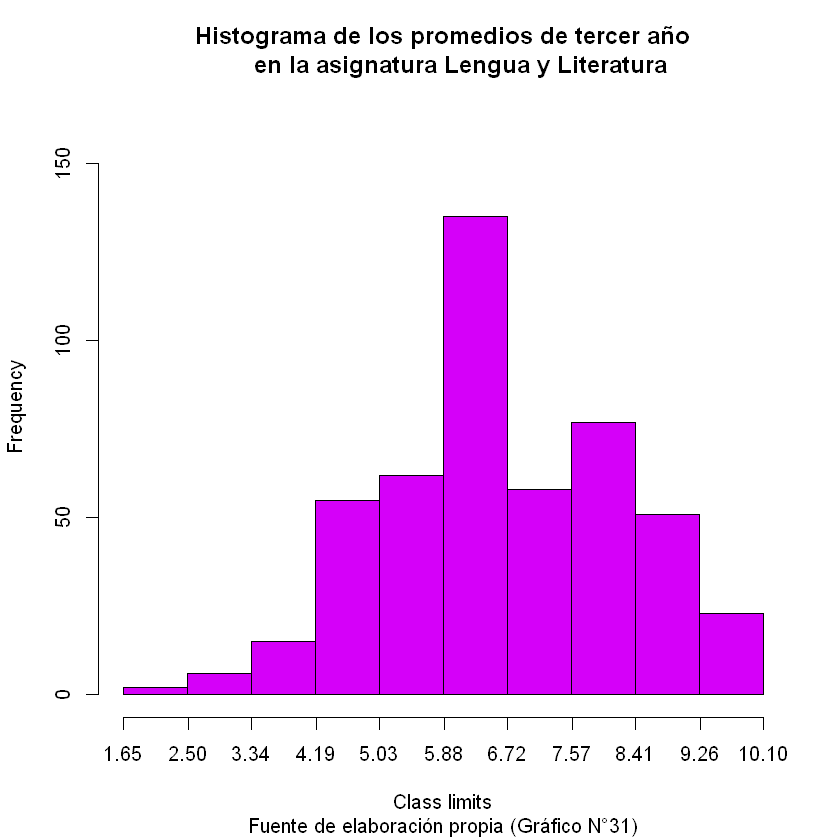

In [347]:
Notas_mat_3_secundaria <- fdt(Victoria_secundaria_tercero_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_3_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de tercer año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°30)",
     col.sub= "black",)

Notas_len_3_secundaria <- fdt(Victoria_secundaria_tercero_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_3_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de tercer año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°31)",
     col.sub= "black",)

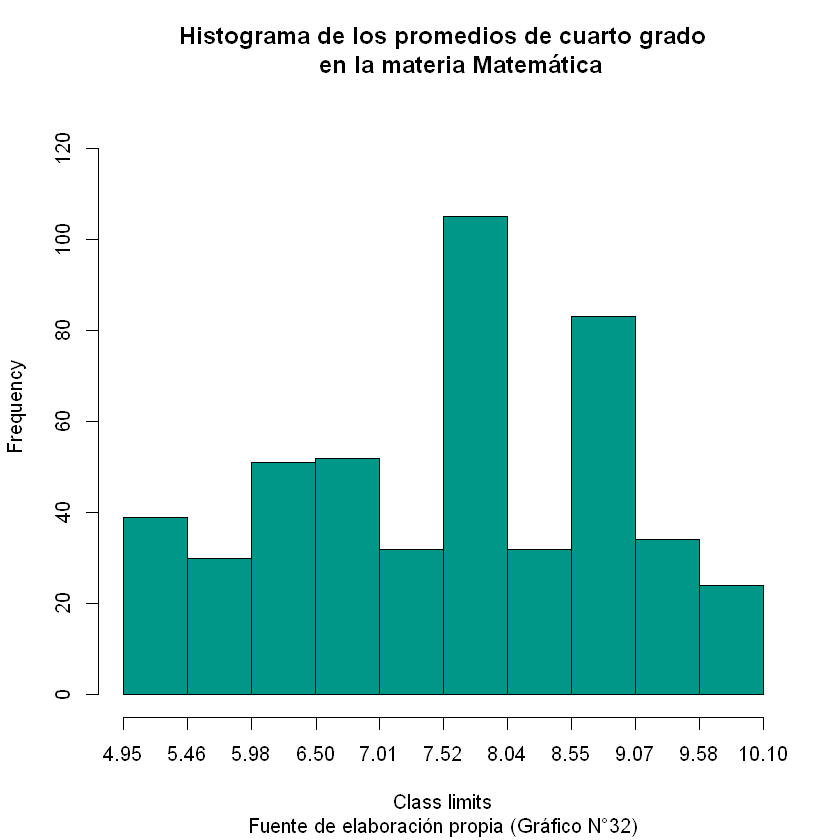

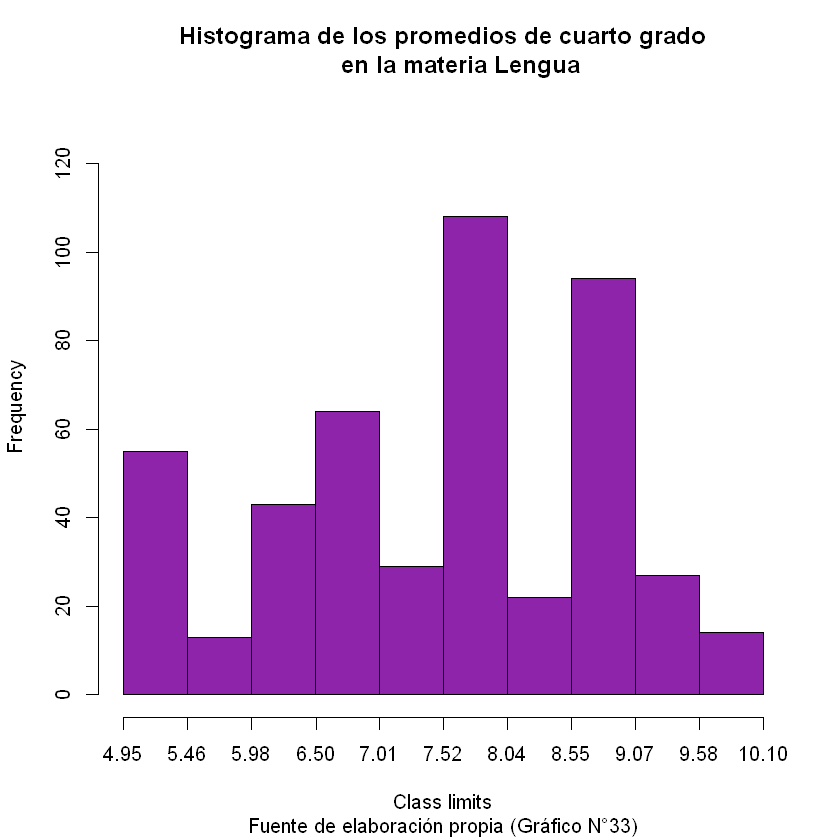

In [343]:
Notas_mat_4_primaria <- fdt(Victoria_primaria_cuarto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_4_primaria, 
     type= "fh", 
     col= verde_celeste,
     main= "Histograma de los promedios de cuarto grado
     en la materia Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°32)",
     col.sub= "black",)

Notas_len_4_primaria <- fdt(Victoria_primaria_cuarto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_4_primaria,
     type= "fh",
     col= violeta_claro,
     main= "Histograma de los promedios de cuarto grado
     en la materia Lengua",
     sub= "

Fuente de elaboración propia (Gráfico N°33)",
     col.sub= "black",)

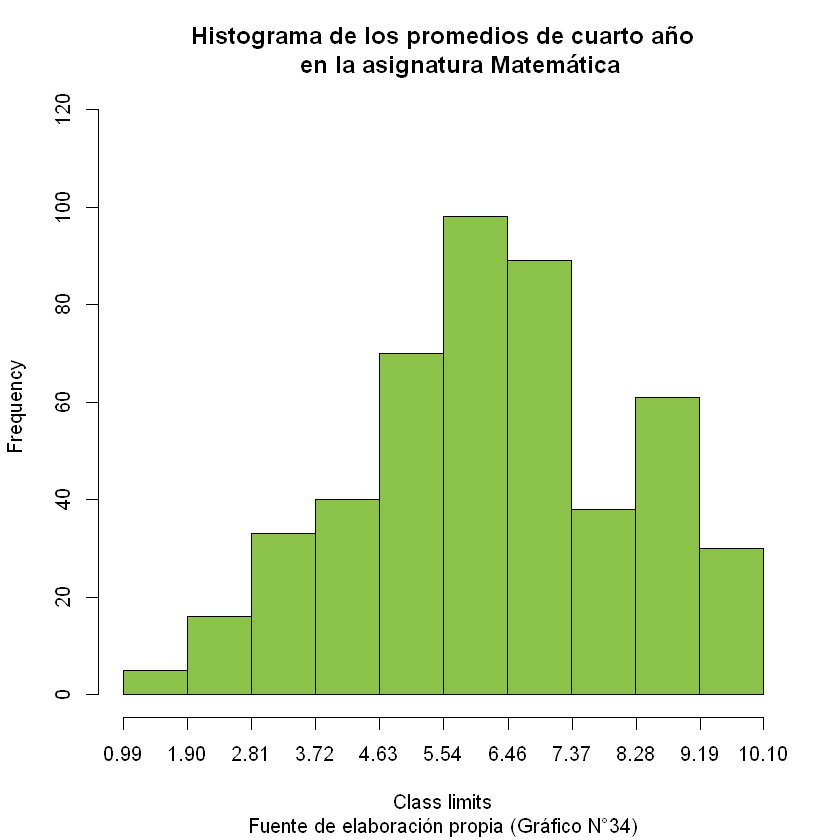

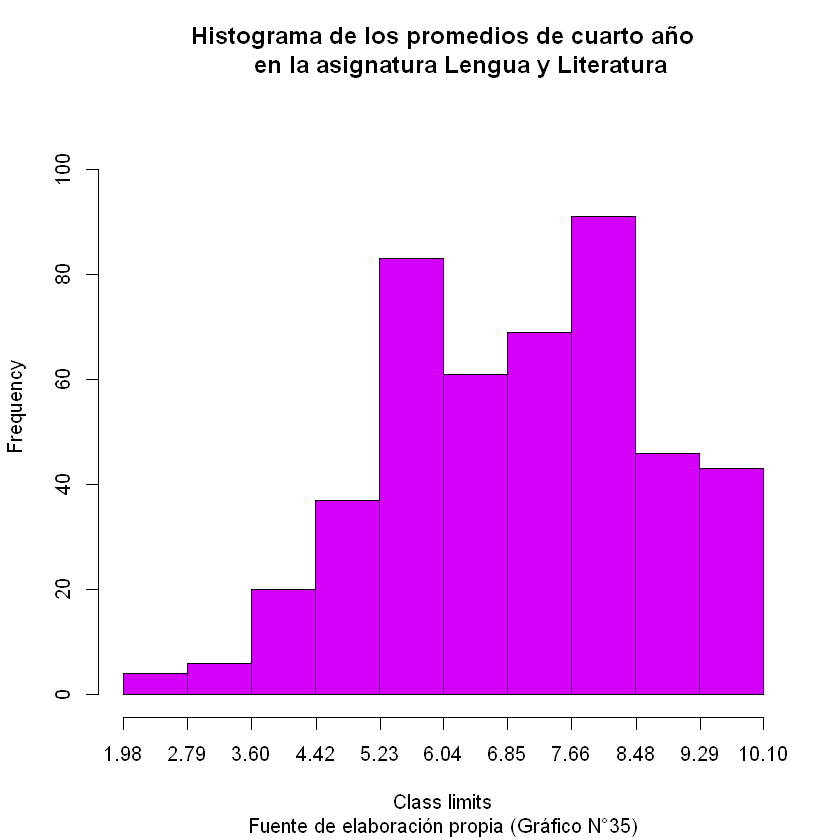

In [349]:
Notas_mat_4_secundaria <- fdt(Victoria_secundaria_cuarto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_4_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°34)",
     col.sub= "black",)

Notas_len_4_secundaria <- fdt(Victoria_secundaria_cuarto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_4_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°35)",
     col.sub= "black",)

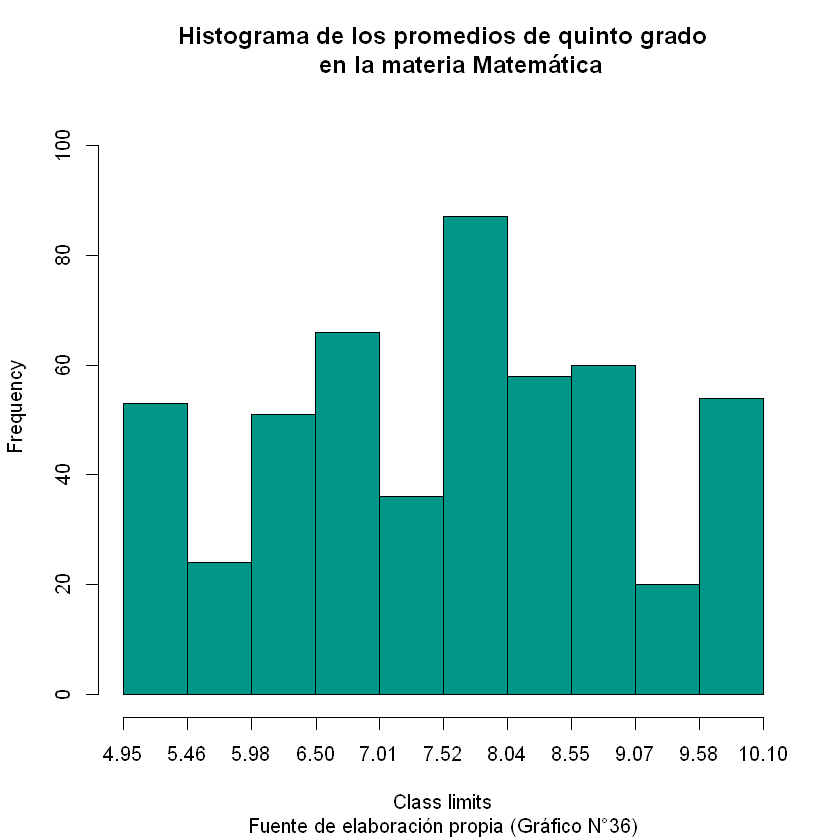

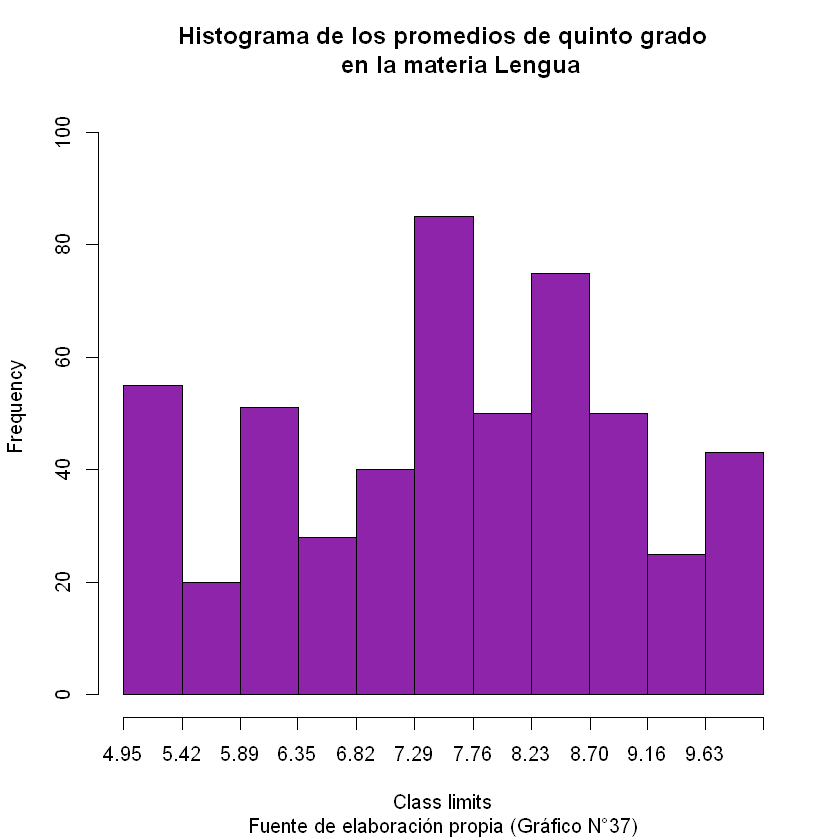

In [344]:
Notas_mat_5_primaria <- fdt(Victoria_primaria_quinto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_5_primaria, 
     type= "fh", 
     col= verde_celeste,
     main= "Histograma de los promedios de quinto grado
     en la materia Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°36)",
     col.sub= "black",)

Notas_len_5_primaria <- fdt(Victoria_primaria_quinto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_5_primaria,
     type= "fh",
     col= violeta_claro,
     main= "Histograma de los promedios de quinto grado
     en la materia Lengua",
     sub= "

Fuente de elaboración propia (Gráfico N°37)",
     col.sub= "black",)

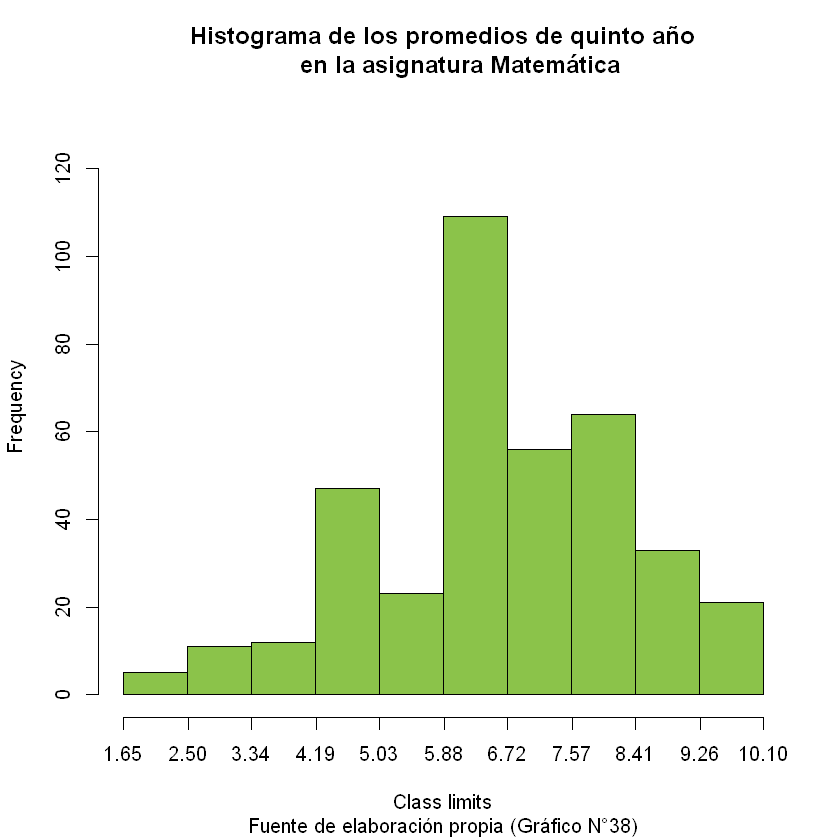

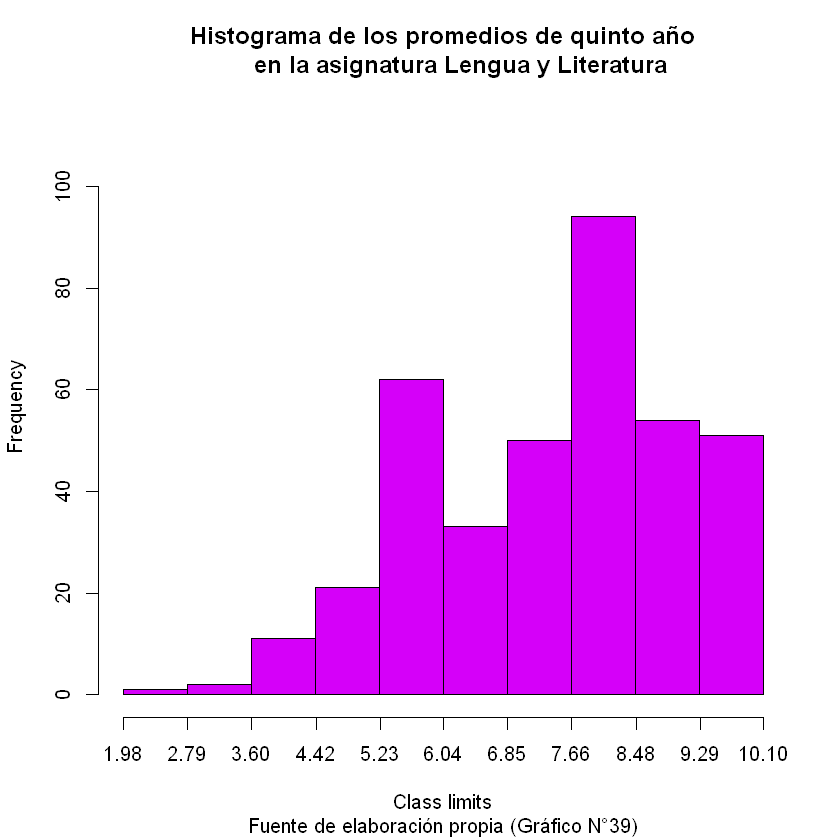

In [350]:
Notas_mat_5_secundaria <- fdt(Victoria_secundaria_quinto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_5_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de quinto año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°38)",
     col.sub= "black",)

Notas_len_5_secundaria <- fdt(Victoria_secundaria_quinto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_5_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de quinto año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°39)",
     col.sub= "black",)

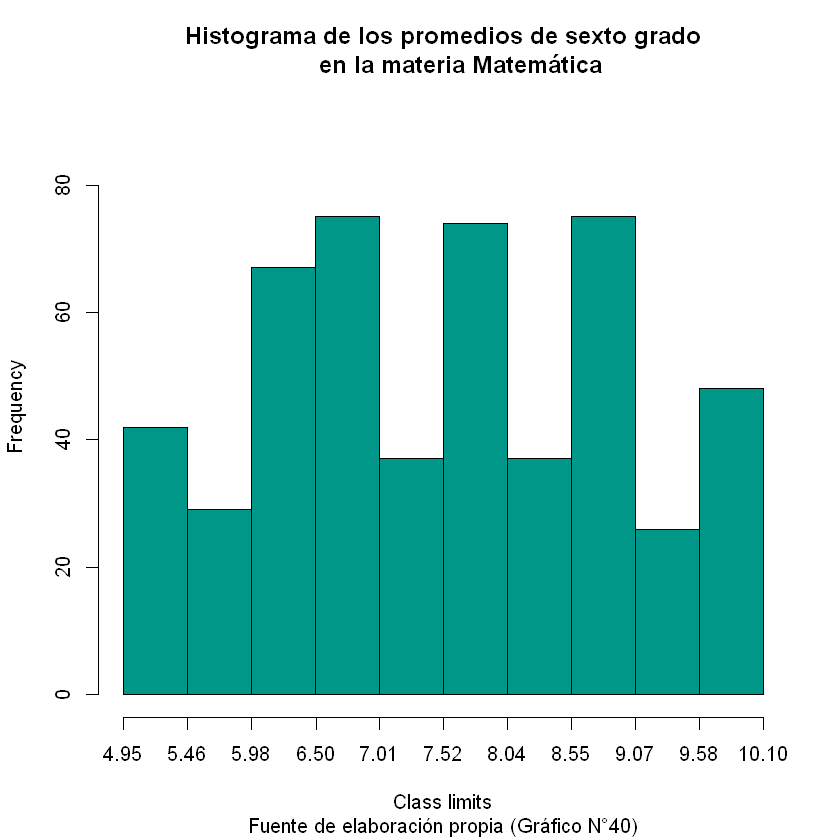

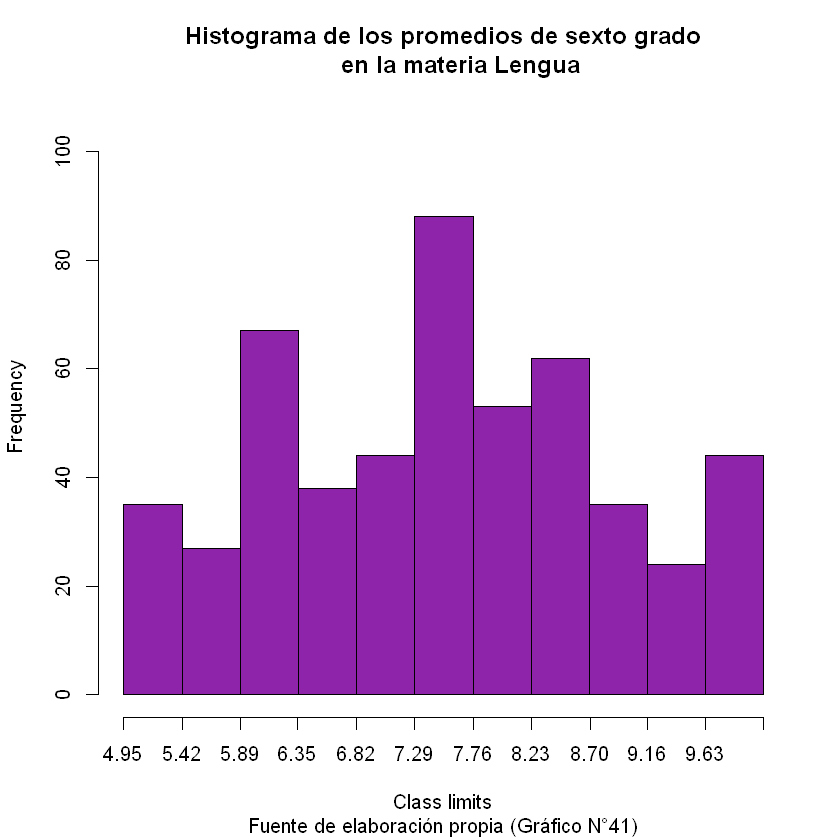

In [345]:
Notas_mat_6_primaria <- fdt(Victoria_primaria_sexto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_6_primaria, 
     type= "fh", 
     col= verde_celeste,
     main= "Histograma de los promedios de sexto grado
     en la materia Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°40)",
     col.sub= "black",)

Notas_len_6_primaria <- fdt(Victoria_primaria_sexto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_6_primaria,
     type= "fh",
     col= violeta_claro,
     main= "Histograma de los promedios de sexto grado
     en la materia Lengua",
     sub= "

Fuente de elaboración propia (Gráfico N°41)",
     col.sub= "black",)

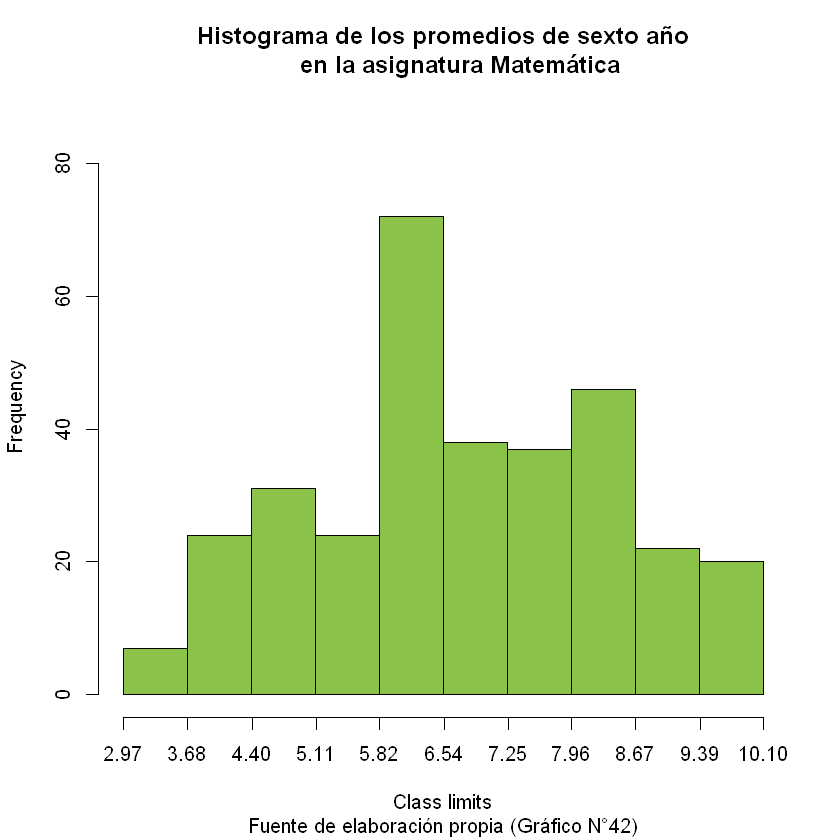

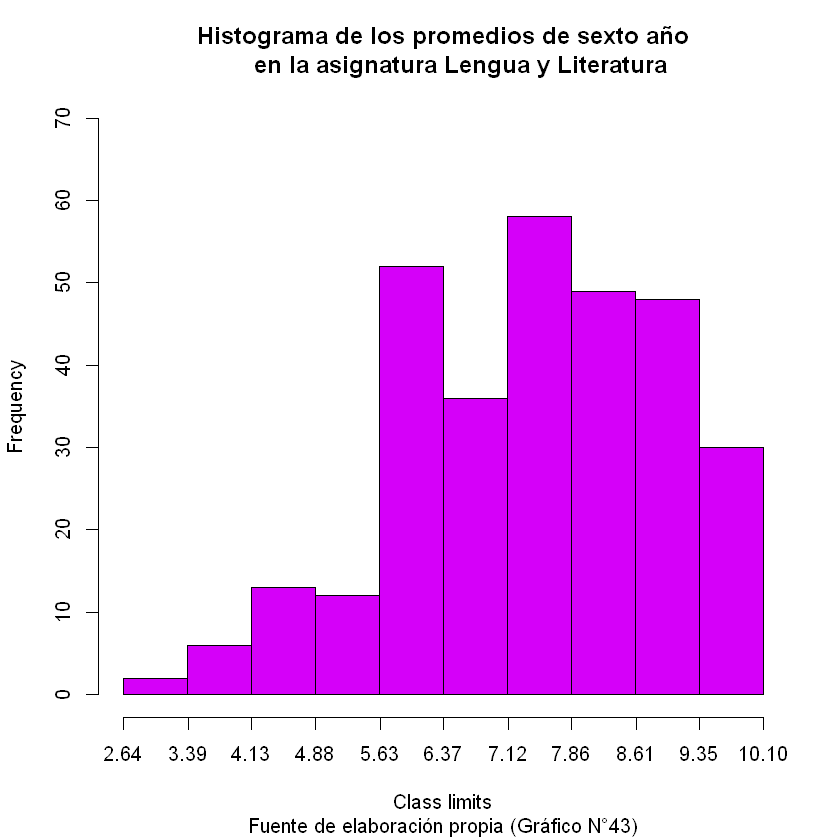

In [351]:
Notas_mat_6_secundaria <- fdt(Victoria_secundaria_sexto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_6_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de sexto año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°42)",
     col.sub= "black",)

Notas_len_6_secundaria <- fdt(Victoria_secundaria_sexto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_6_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de sexto año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°43)",
     col.sub= "black",)

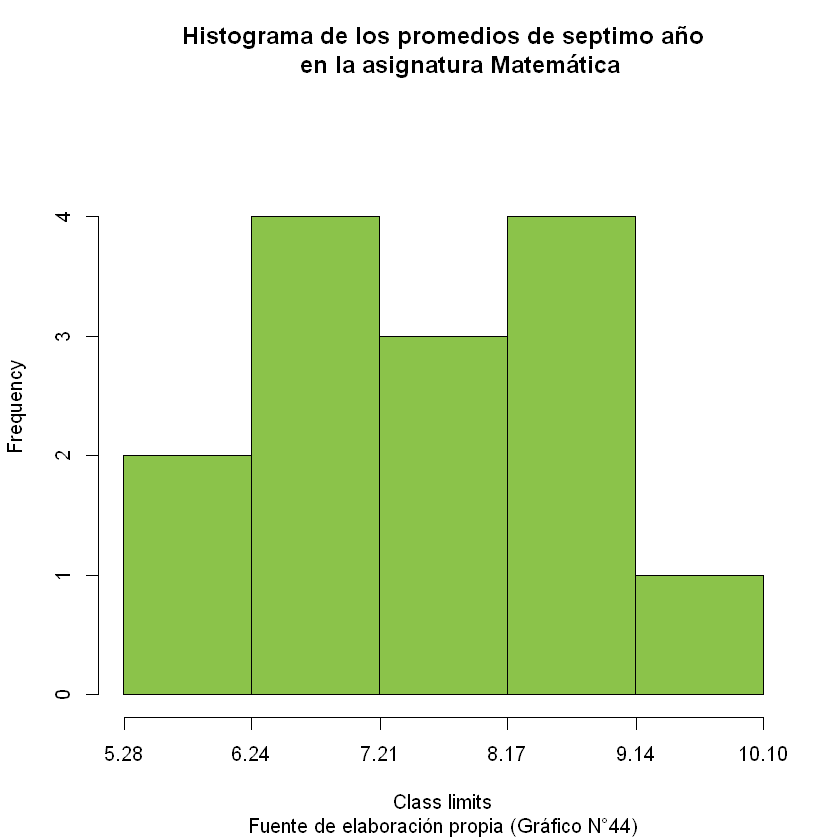

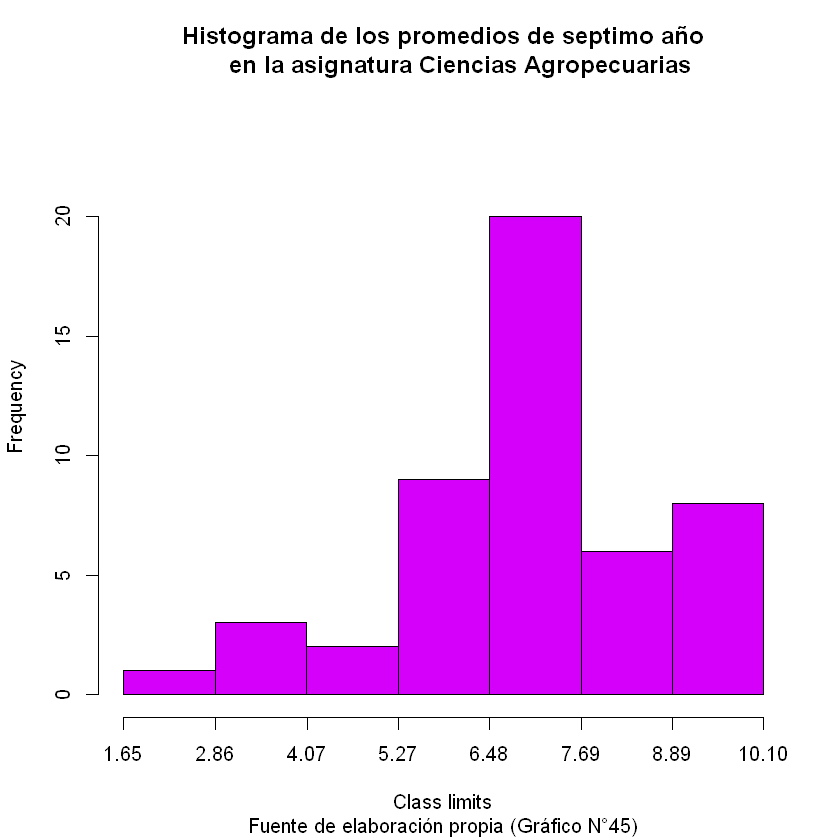

In [352]:
Notas_mat_7_secundaria <- fdt(Victoria_secundaria_septimo_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_7_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de septimo año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°44)",
     col.sub= "black",)

Notas_agro_7_secundaria <- fdt(Victoria_secundaria_septimo_agro$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_agro_7_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de septimo año
     en la asignatura Ciencias Agropecuarias",
     sub= "

Fuente de elaboración propia (Gráfico N°45)",
     col.sub= "black",)